Мартынов А.Ю 
3821М1ПР1


Задачи:

0. Описать задачу словами 
1. Прочитать данные 
2. Визуализировать данные и вычислить основные признаки (среднее, разброс, матрицу корреляции и тд), провести интерпритацию. 
3. Обработать пропущенные значенийя (или убедиться, что их нет) 
4. Обработать категориальные признаки 
5. Провести нормализацию (или объяснить, почему она не нужна) 
6. Разбить данные на обучающую и тестовую выборки 
7. Запустить классификатор (регрессию) knn или другой (аргументировав свой выбор) 
8. Подобрать оптимальное колисетво ближайших соседей (или другого гиперпараметра)
9. Вычислить ошибки на обучающей и тестовых выборках 
10. Запустить другие классификаторы и выбрать параметры, выбрать релевантные и сравнить результаты 
11. Как-то побороться с несбалансированностью классов (если она есть) 
12. Исключить коррелированные переменные 
13. Сделать общий вывод 


0) Описать задачу словами: 
Решается задача бинарной классификации:предсказать - подпишет ли клиент срочный банковский депозит.
- Колисчество данных: N = 41188
- Количество презнаков: d = 20
- Количество классов: K = 2

1. Прочитать данные


In [1]:
# импортируем необходимые библиотеки
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn

Загрузим наши данные

In [2]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/Alexfrom38/ML_Maga/main/bank-additional-full.csv", sep = ";")

In [3]:
raw_data.shape

(41188, 21)

In [4]:
raw_data.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
raw_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Теперь кратко пройдёмся по столбцам - признакам. Всего их 20 \
Тип признаков:
- age (возраст)
- job (тип работы)
- marital (личные отношения)
- education (образование)
- default (объявлял банкротство?)
- housing (есть ли долг по недвижимости)
- loan (есть ли личный долг)
- contact (как с ним контактировали - мобильный или домашний телефон)
- month (последний месяц, когда контактировали)
- day_of_week (последний день недели, когда контактировали)
- duration (длительность последнего контакта в секундах)
- campaign (сколько контактов с ним было в текущую кампанию)
- pdays (сколько прошло дней с момента когда последний раз был контакт в предыдущую кампанию)
- previous (сколько контактов было с клиентом до текущей кампании)
- poutcome (итог предыдущей кампании)
- emp.var.rate (изменение уровня занятости за квартал. Он рассчитывается как процентное изменение количества занятых лиц в сравнении с предыдущим кварталом)
- cons.price.idx (изменение уровня цен на товары и услуги, приобретаемые населением, за месяц. Он рассчитывается как средневзвешенная величина изменения цен на корзину товаров и услуг, которая включает в себя основные категории расходов домохозяйств, такие как продукты питания, жилье, одежда, транспорт и т.д.)
- cons.conf.idx (отражает уровень оптимизма или пессимизма потребителей относительно текущей и будущей экономической ситуации. Он рассчитывается на основе опросов домохозяйств)
- euribor3m(Euro Interbank Offered Rate - это показатель, который отражает среднюю ставку, по которой банки Европейского союза готовы предоставлять кредиты друг другу на короткие сроки, обычно от 1 дня до 1 года), *число*
- nr.employed (количество работников банка)
- y ( итоговый бинарный классификатор -   согласился клиент сделать депозит (да/нет))

2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

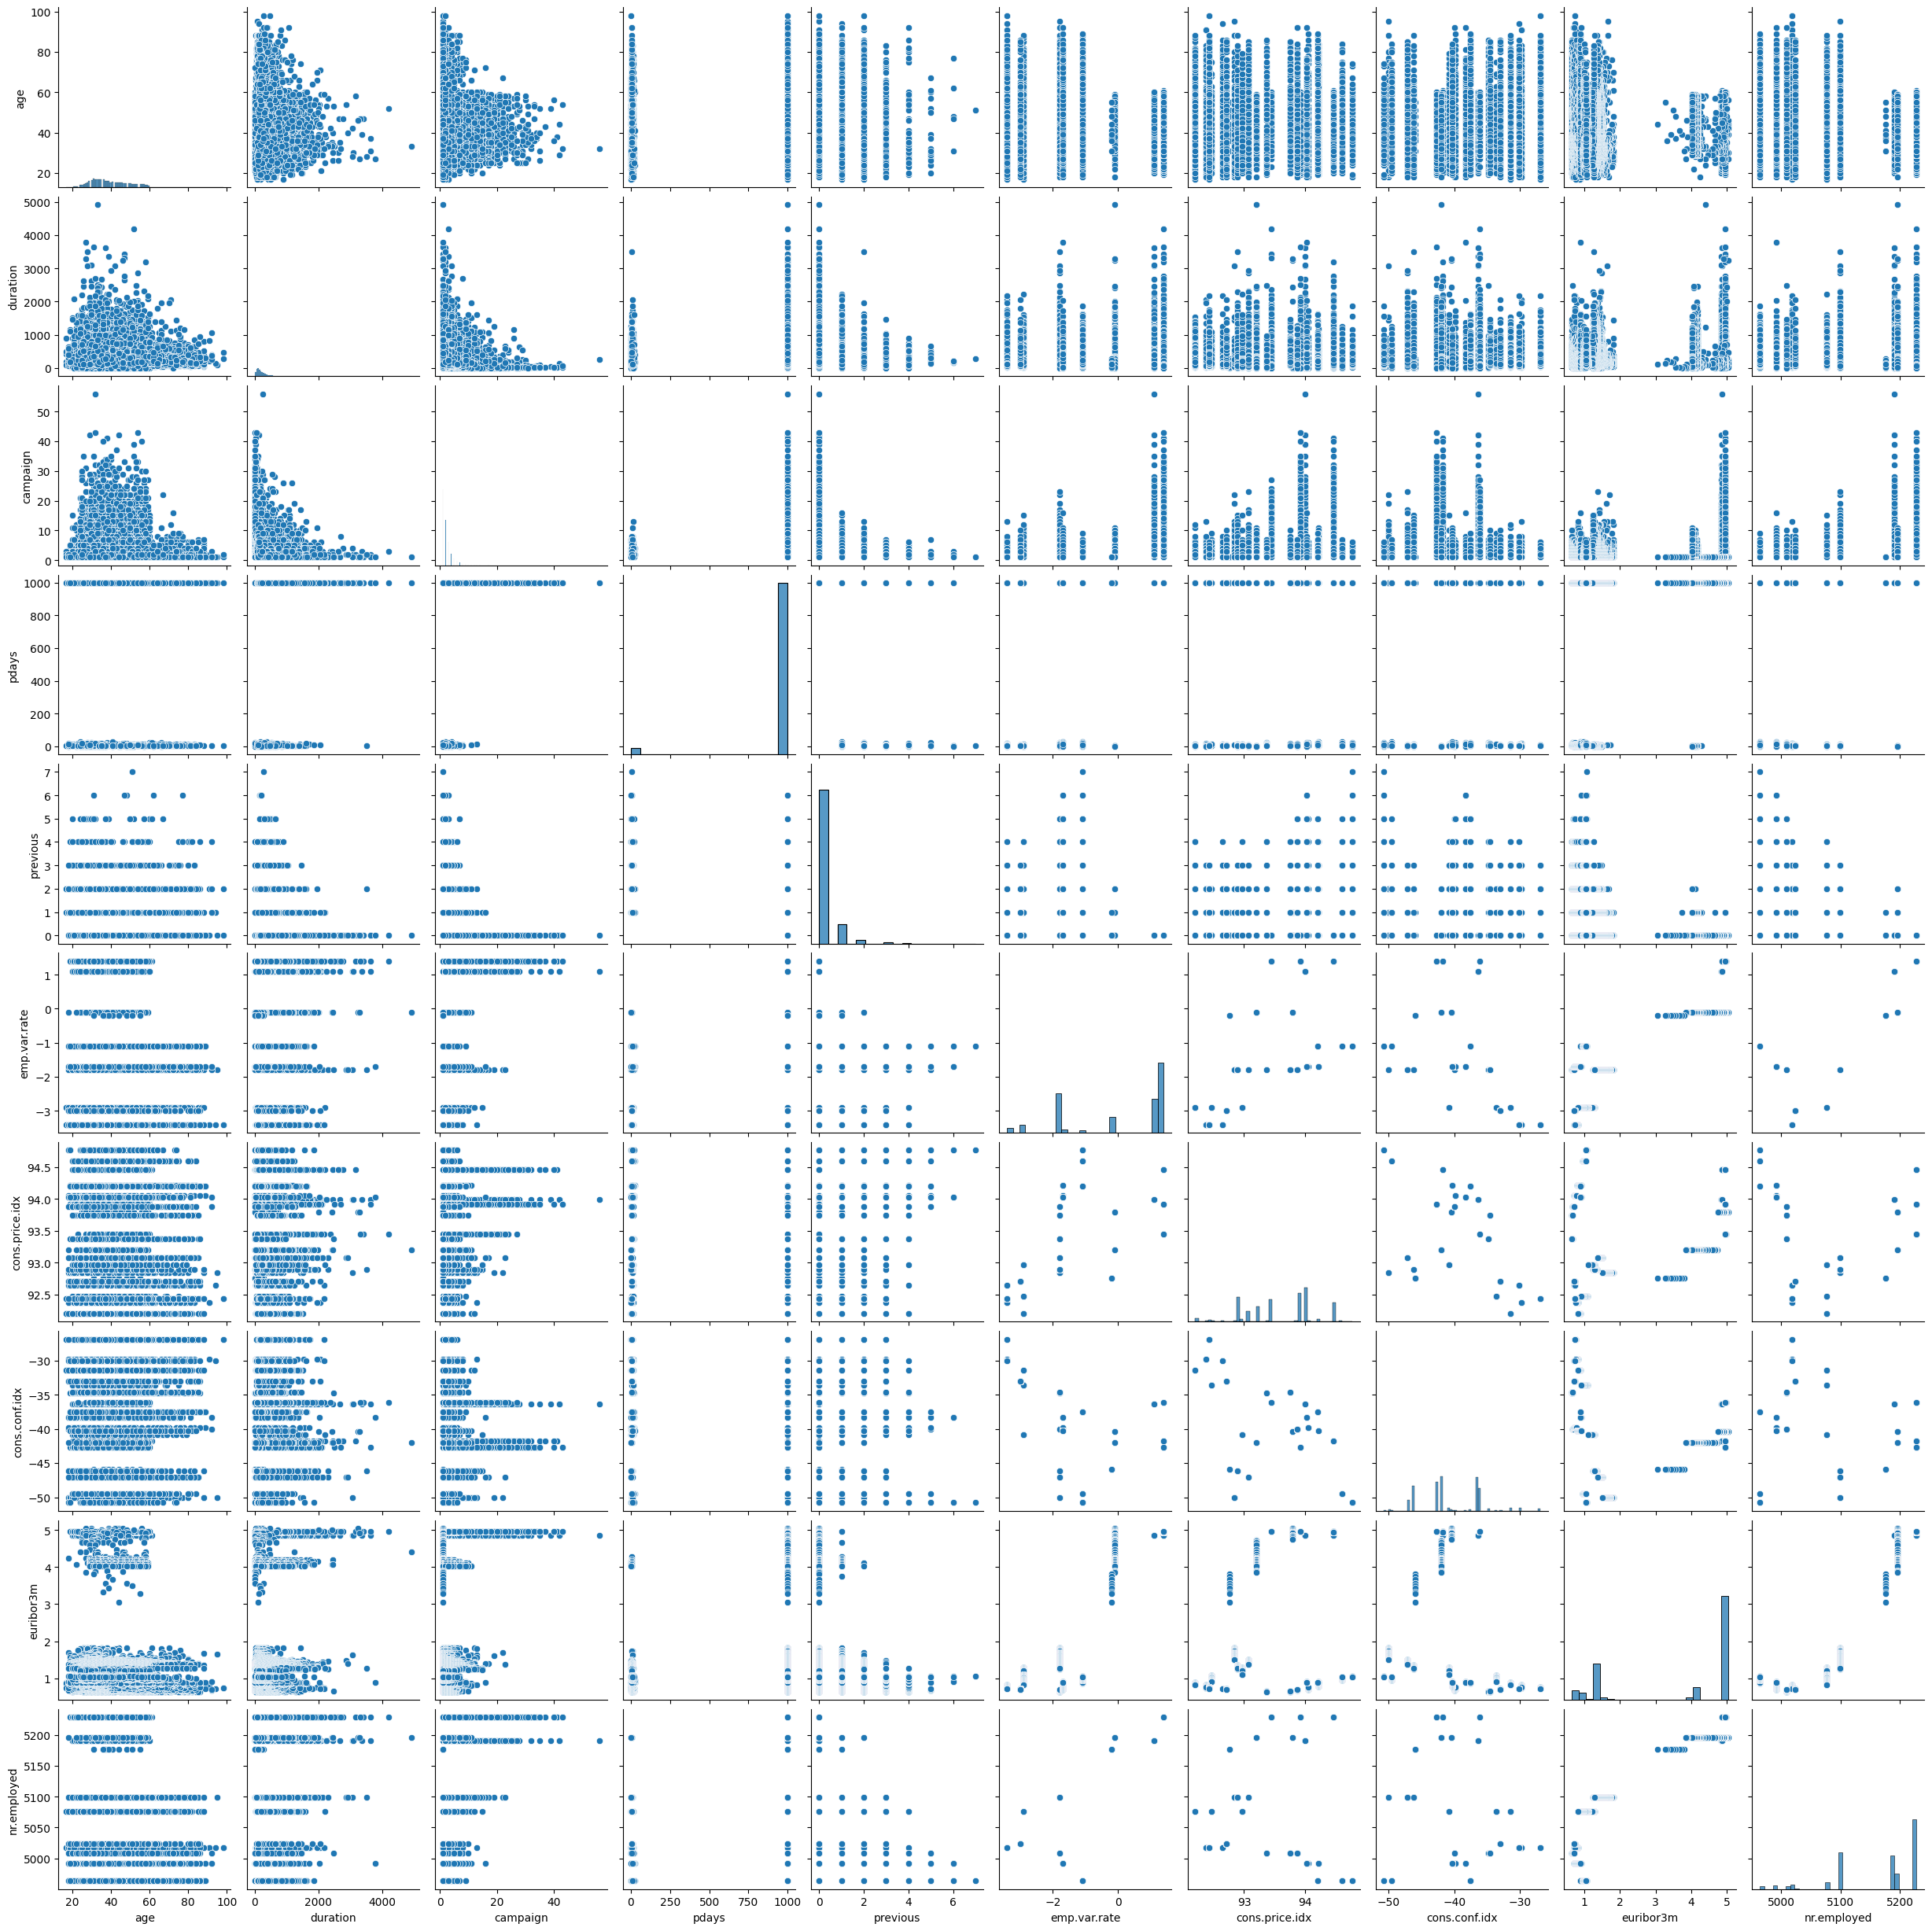

In [7]:
sns.pairplot(raw_data)

Рассмотри каждый класс по отдельности (построим гистограмму и уберём выбросы)


<Axes: xlabel='age', ylabel='Count'>

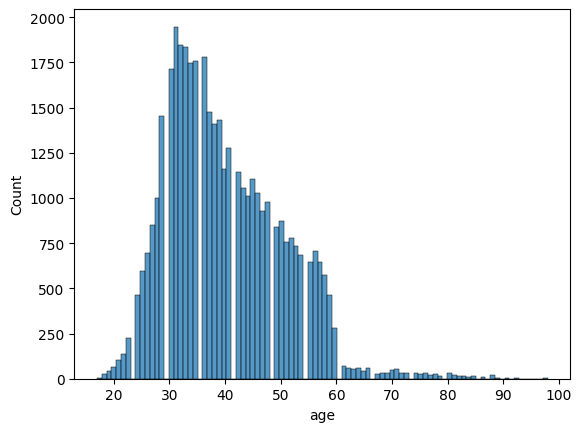

In [8]:
sns.histplot(raw_data['age'])

<Axes: ylabel='age'>

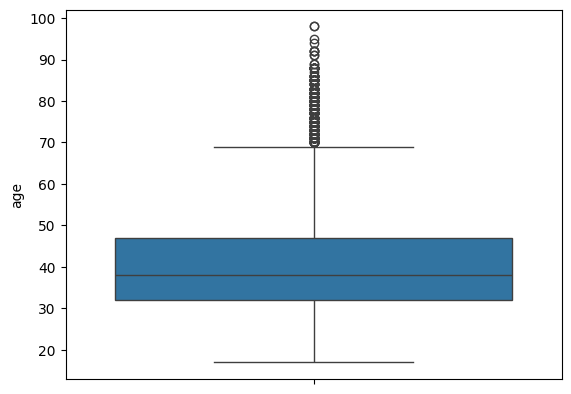

In [9]:
sns.boxplot(raw_data['age'])

In [10]:
raw_data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Видим: основное количество звонков приходится на **работающих** людей возраста около $40$ лет. Людям на пенсии они почти не звонили. Впринципе это довольно логично, так как люди ~ в 40 лет имеют стабильный заработок (который должен быть на нормальном уровне из-за наличия хорошего опыта работы и некоторых планов)

In [11]:
raw_data['age'].quantile([0.005])

0.005    21.0
Name: age, dtype: float64

In [12]:
raw_data['age'].quantile([0.955])

0.955    58.0
Name: age, dtype: float64

< 0,5% имеют возраст меньше 21 года и 95% имеет возраст меньше 58 лет. Можнм порезать по этим значениям.

<Axes: ylabel='age'>

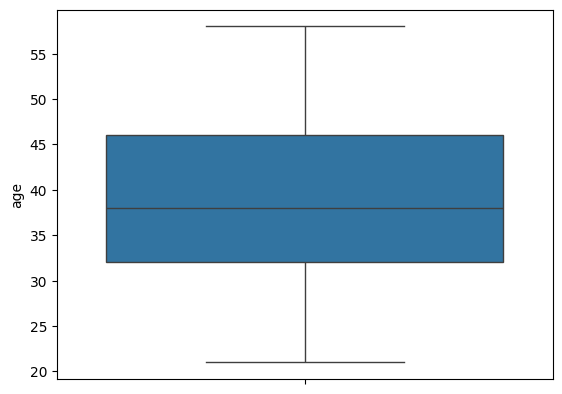

In [13]:
raw_data = raw_data[raw_data['age'] <= 58.0]
raw_data = raw_data[raw_data['age'] >= 21.0]
sns.boxplot(raw_data['age'])

<Axes: xlabel='campaign', ylabel='Count'>

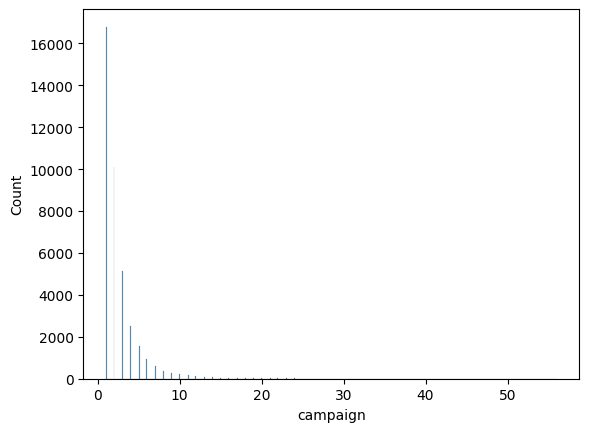

In [14]:
sns.histplot(raw_data['campaign'])

<Axes: ylabel='campaign'>

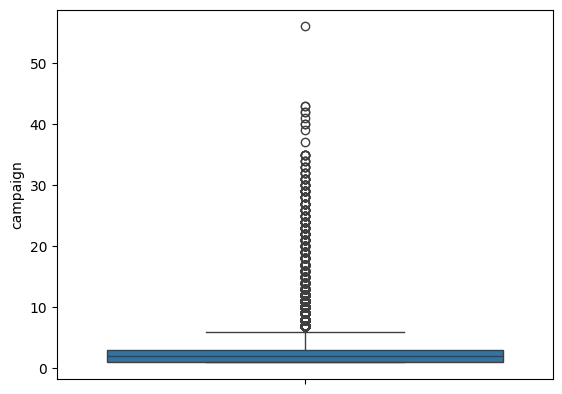

In [15]:
sns.boxplot(raw_data['campaign'])

campaign - сколько контактов с ним было в текущую кампанию


In [16]:
raw_data['campaign'].describe()

count    39392.000000
mean         2.580524
std          2.792242
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

Видим: основное число звонков приходится на 2-3, остальные значения образую некоторые выборосы (например, как 56 звонков.....)
Будем резать их


In [17]:
print(f" 95,5% от всего кол-ва звонков  = {raw_data['campaign'].quantile(0.955)}")
raw_data = raw_data[raw_data['campaign'] < raw_data['campaign'].quantile(0.955)]

 95,5% от всего кол-ва звонков  = 7.0


<Axes: xlabel='campaign', ylabel='Count'>

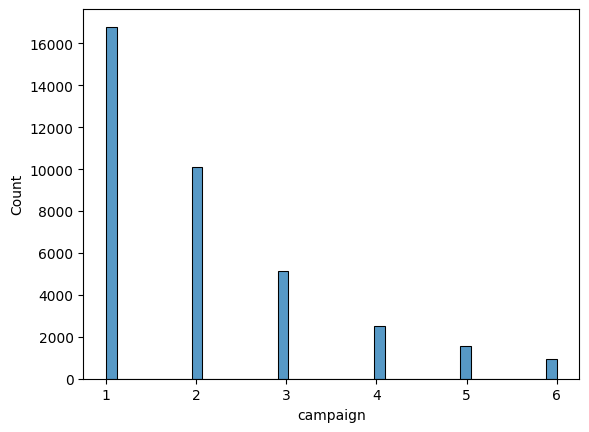

In [18]:
sns.histplot(raw_data['campaign'])

<Axes: ylabel='campaign'>

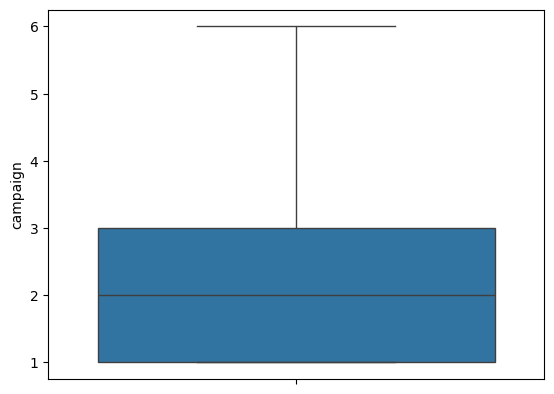

In [19]:
sns.boxplot(raw_data['campaign'])

<Axes: xlabel='pdays', ylabel='Count'>

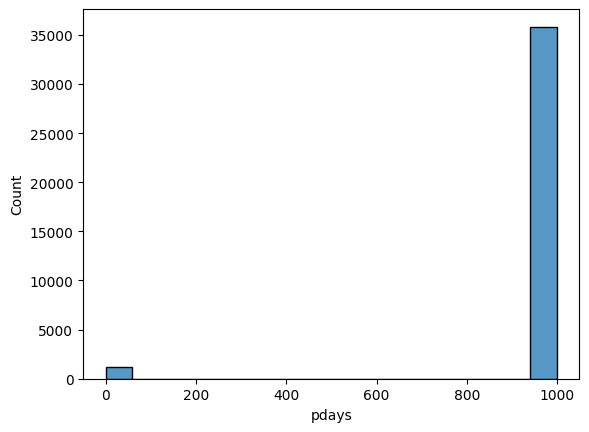

In [20]:
sns.histplot(raw_data['pdays'])

<Axes: ylabel='pdays'>

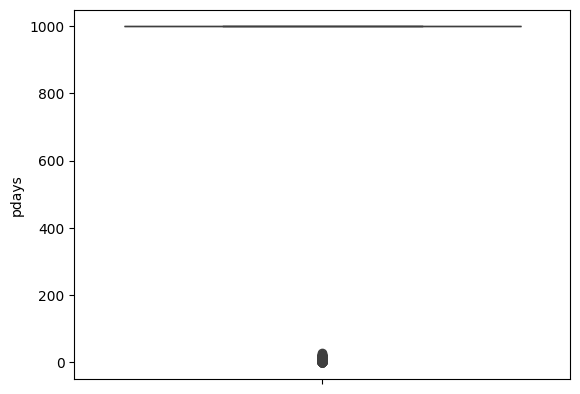

In [21]:
sns.boxplot(raw_data['pdays'])

In [22]:
raw_data['pdays'].describe()

count    37066.000000
mean       966.023660
std        177.924749
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

<Axes: ylabel='previous'>

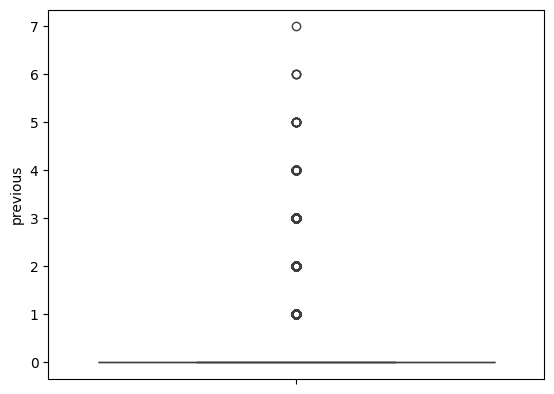

In [23]:
sns.boxplot(raw_data['previous'])

<Axes: xlabel='previous', ylabel='Count'>

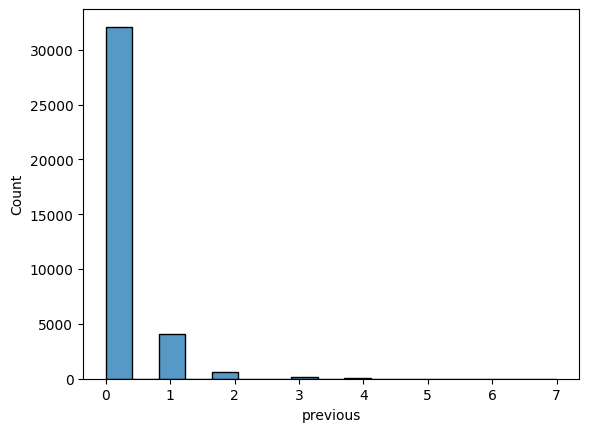

In [24]:
sns.histplot(raw_data['previous'])

In [25]:
raw_data['previous'].describe()

count    37066.000000
mean         0.166352
std          0.478099
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [26]:
raw_data['previous'].quantile(0.99)

2.0

<Axes: ylabel='previous'>

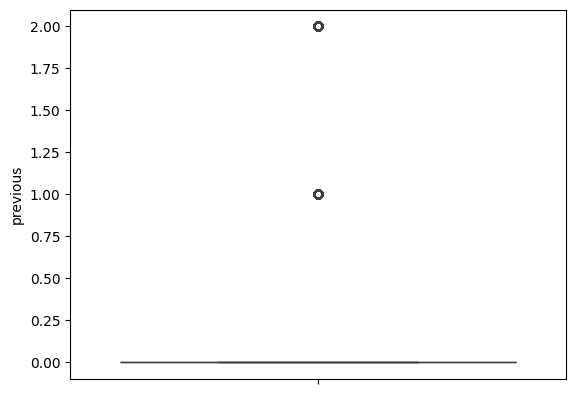

In [27]:
raw_data = raw_data[raw_data['previous'] <= raw_data['previous'].quantile(0.99)]
sns.boxplot(raw_data['previous'])

<Axes: xlabel='previous', ylabel='Count'>

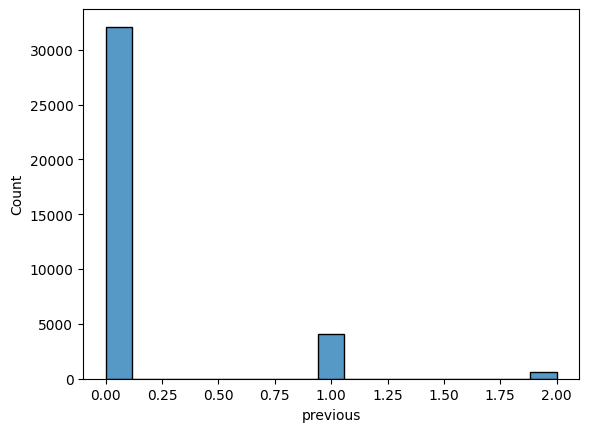

In [28]:
sns.histplot(raw_data['previous'])

<Axes: xlabel='emp.var.rate', ylabel='Count'>

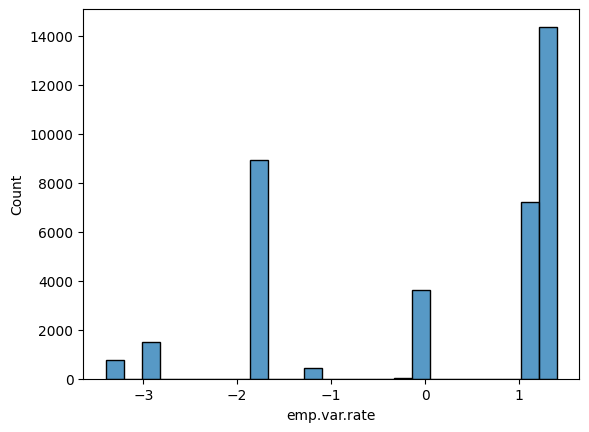

In [29]:
sns.histplot(raw_data['emp.var.rate'])

Видим, что в большинстве случаев, компания звонила во время того, как наблюдался рост количества занятых лиц в сравнении с предыдущим кварталом (возможно этосвзяано с тем, что компании надеятся, что у людей будет больше денег.)
Большое количество звонков компания во время спада количесттва занятых лиц возможно свзяано с тем, что они ъотят подстроиться под людей, которые хотят попробовать вложить свои деньги, чтобы уйти от лишних трат + получать пассивный доход от вклада)
Думаю, что в данном случае выборку нельзя резать.

<Axes: ylabel='emp.var.rate'>

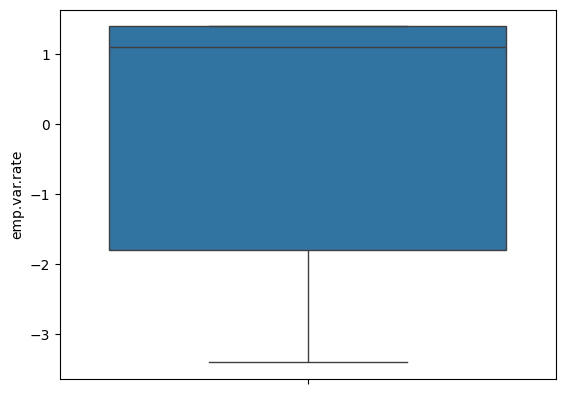

In [30]:
sns.boxplot(raw_data['emp.var.rate'])

cons.price.idx  -индексом потребительских цен - изменение уровня цен на товары и услуги, приобретаемые населением, за месяц. Он рассчитывается как средневзвешенная величина изменения цен на корзину товаров и услуг, которая включает в себя основные категории расходов домохозяйств, такие как продукты питания, жилье, одежда, транспорт и т.д.

(загуглил, что он значит) Индекс потребительских цен (ИПЦ) обычно рассчитывается относительно базового периода. Например, если базовый период установлен на 100, то значения выше 100 указывают на инфляцию (рост цен) по сравнению с базовым периодом, а значения ниже 100 - на дефляцию.
Тогда мы поулчаем, что компания звонила в моменты, когда происходила деинфляция, а значи роста покупательская способность населения => больше денег у людей.


<Axes: xlabel='cons.price.idx', ylabel='Count'>

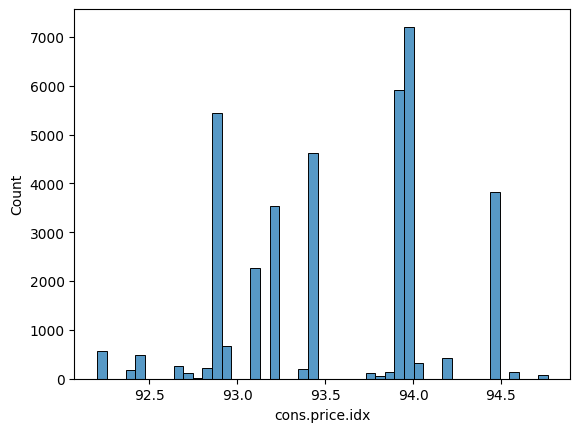

In [31]:
sns.histplot(raw_data['cons.price.idx'])

<Axes: ylabel='cons.price.idx'>

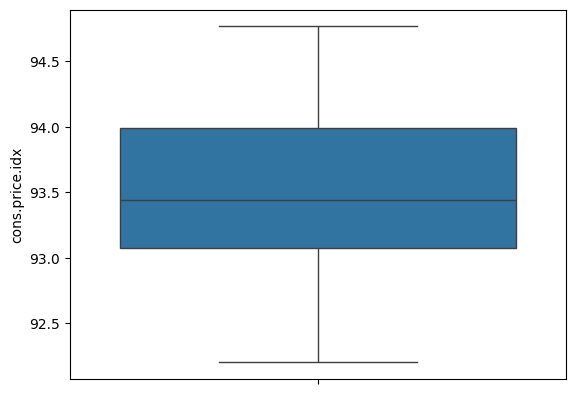

In [32]:
sns.boxplot(raw_data['cons.price.idx'])

In [33]:
raw_data['cons.price.idx'].describe()

count    36818.000000
mean        93.572525
std          0.566974
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

<Axes: xlabel='cons.conf.idx', ylabel='Count'>

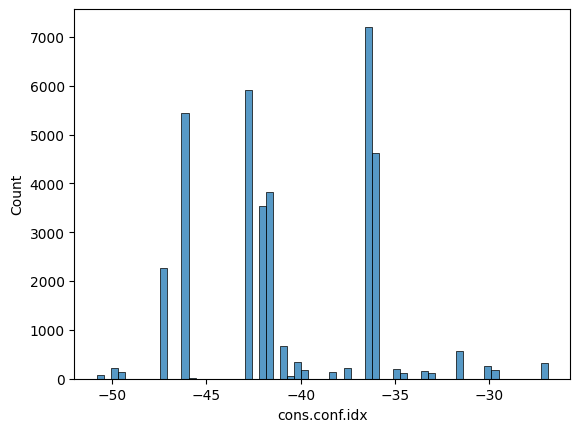

In [34]:
sns.histplot(raw_data['cons.conf.idx'])

<Axes: ylabel='cons.conf.idx'>

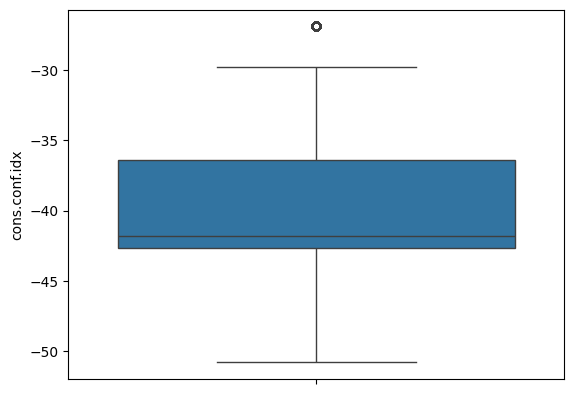

In [35]:
sns.boxplot(raw_data['cons.conf.idx'])

In [36]:
raw_data['cons.conf.idx'].describe()

count    36818.000000
mean       -40.627275
std          4.518560
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

Видим, что активность компании была завязана на то, что люди ожидают кризисной ситуации и хотят сохранить свои сбережения от обесценивания.

<Axes: ylabel='cons.conf.idx'>

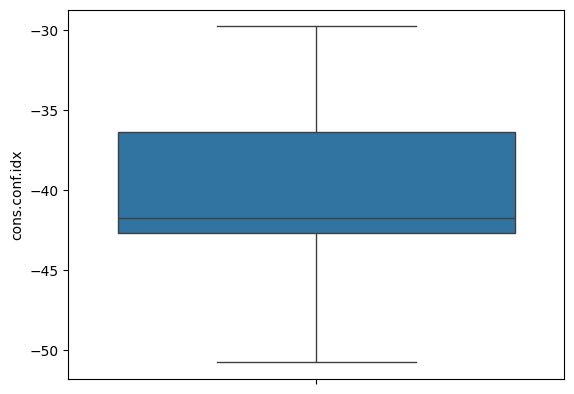

In [37]:
raw_data = raw_data[raw_data['cons.conf.idx'] <= raw_data['cons.conf.idx'].quantile(0.99)]
sns.boxplot(raw_data['cons.conf.idx'])

<Axes: xlabel='cons.conf.idx', ylabel='Count'>

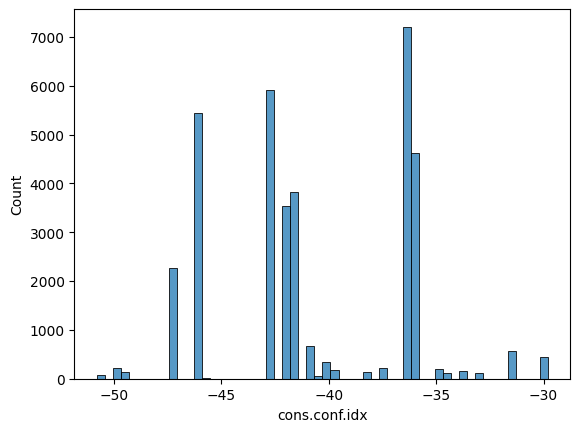

In [38]:
sns.histplot(raw_data['cons.conf.idx'])

<Axes: xlabel='euribor3m', ylabel='Count'>

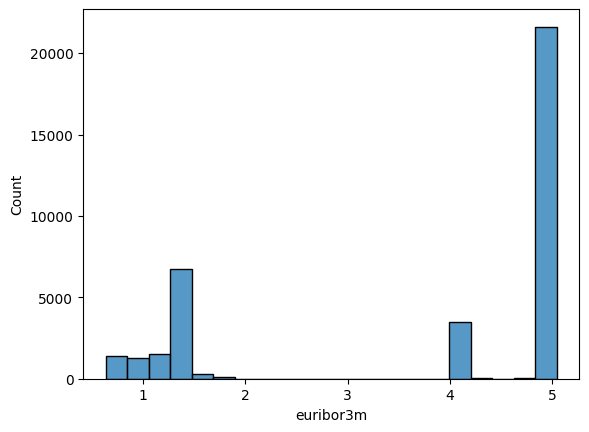

In [39]:
sns.histplot(raw_data['euribor3m'])

<Axes: ylabel='euribor3m'>

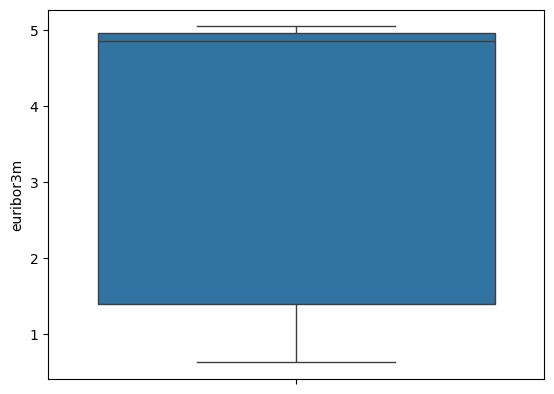

In [40]:
sns.boxplot(raw_data['euribor3m'])

In [41]:
raw_data['euribor3m'].describe()

count    36495.000000
mean         3.692903
std          1.686554
min          0.634000
25%          1.400000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

<Axes: xlabel='nr.employed', ylabel='Count'>

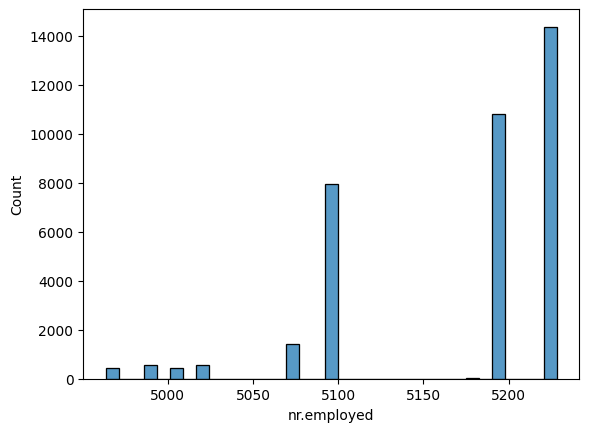

In [42]:
sns.histplot(raw_data['nr.employed'])

count    36495.000000
mean      5171.186206
std         67.470262
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

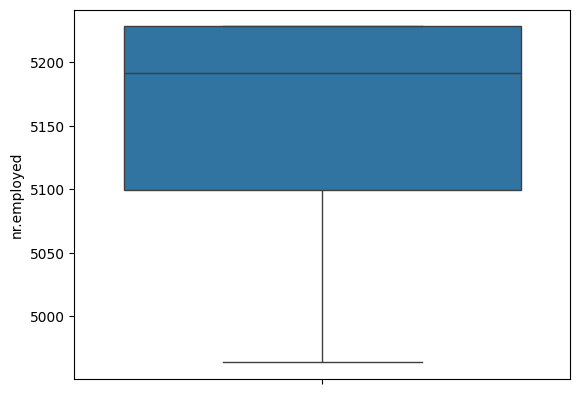

In [43]:
sns.boxplot(raw_data['nr.employed'])
raw_data['nr.employed'].describe()

Видим, что во время компании по превлечению, в банке работало около 5к человек.

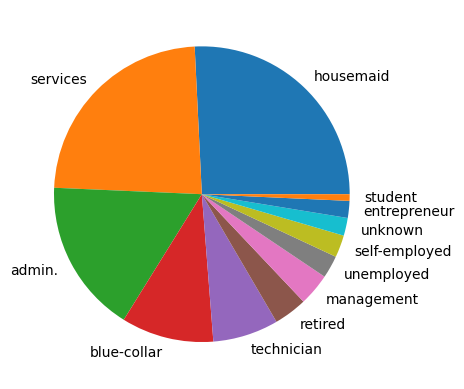

In [44]:
plt.pie(raw_data['job'].value_counts().values,labels = list(raw_data['job'].unique()))
pass
# pass чтобы убрать доп выводы с адресами и тп

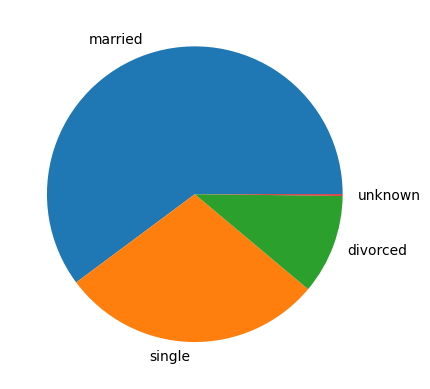

In [45]:
plt.pie(raw_data['marital'].value_counts().values,labels = list(raw_data['marital'].unique()))
pass

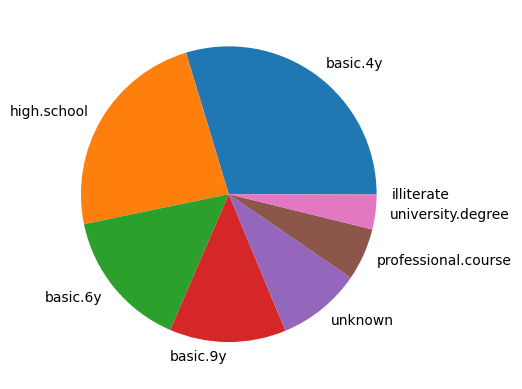

In [46]:
plt.pie(raw_data['education'].value_counts().values,labels = list(raw_data['education'].unique()))
pass

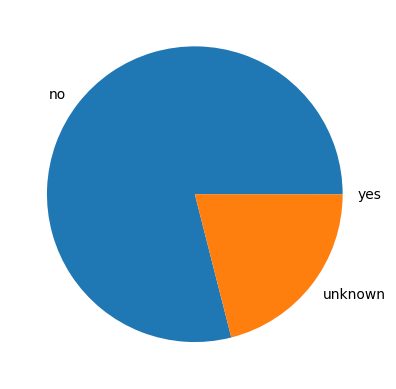

In [47]:
plt.pie(raw_data['default'].value_counts().values,labels = list(raw_data['default'].unique()))
pass

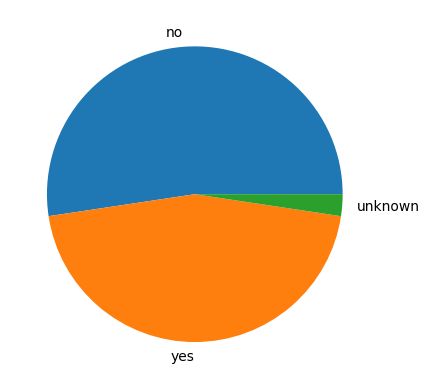

In [48]:
plt.pie(raw_data['housing'].value_counts().values,labels = list(raw_data['housing'].unique()))
pass

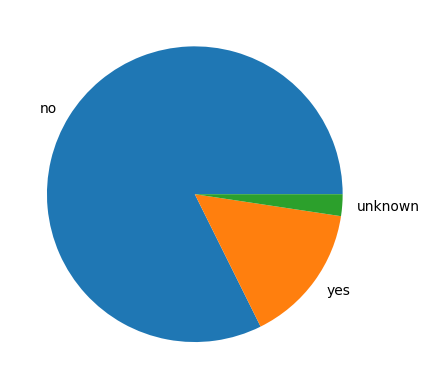

In [49]:
plt.pie(raw_data['loan'].value_counts().values,labels = list(raw_data['loan'].unique()))
pass

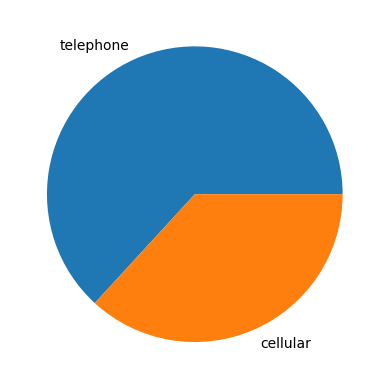

In [50]:
plt.pie(raw_data['contact'].value_counts().values,labels = list(raw_data['contact'].unique()))
pass

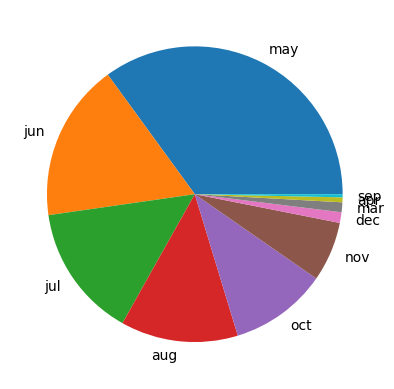

In [51]:
plt.pie(raw_data['month'].value_counts().values,labels = list(raw_data['month'].unique()))
pass

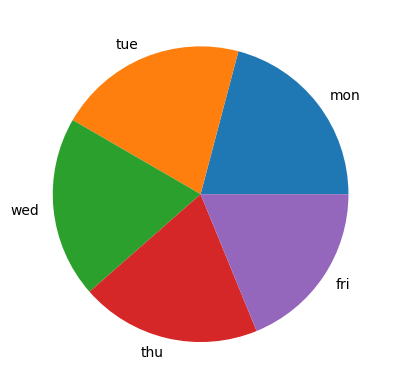

In [52]:
plt.pie(raw_data['day_of_week'].value_counts().values,labels = list(raw_data['day_of_week'].unique()))
pass

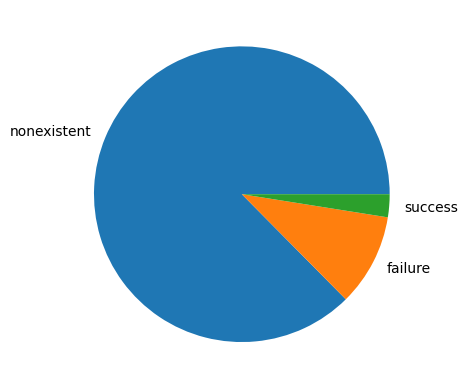

In [53]:
plt.pie(raw_data['poutcome'].value_counts().values,labels = list(raw_data['poutcome'].unique()))
pass

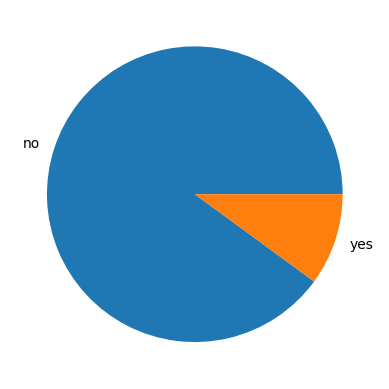

In [54]:
plt.pie(raw_data['y'].value_counts().values,labels = list(raw_data['y'].unique()))
pass

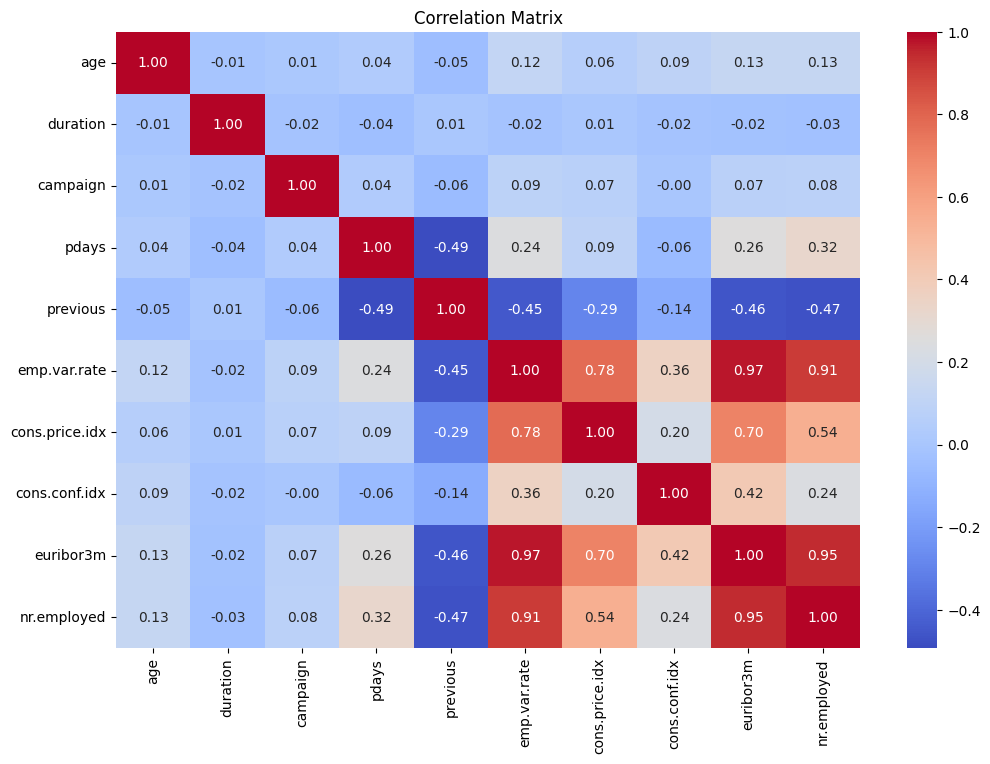

In [55]:
corr_matrix = raw_data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Взглянув на матрицу корреляуии, иожно сказать, что корреляция есть долько между экономическими критериями (выделяется подматрица крассного оттенка, кроме 2-х параметров), что вполне логично. Возраст, количество звонков и тп совершенно не коррелиркют.



In [56]:
raw_data.shape

(36495, 21)

In [57]:
raw_data[raw_data.apply(lambda row: row.astype(str).str.contains('unknown').any(), axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41115,42,services,divorced,university.degree,no,unknown,unknown,cellular,nov,tue,...,1,999,1,failure,-1.1,94.767,-50.8,1.046,4963.6,yes
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


получили 9377 пропущенных значений (после обработки осталось всего 36495 значиний, а значит ~25% имееет пропущенные значения\
Можно пойти двумя путями: 
1) удалить пропущенные значения (т.е. удалить всю запись)
2) вставить в пропущенные значия что-то новое, основываясь на каком-то правиле (будем использовать правило - заполнение самым частым знавением). \
наверное можно будет попробовать пойти по двум стратегиям. Увидим, куда они приведут

In [90]:
from sklearn.impute import SimpleImputer

raw_data = raw_data
raw_data_old = raw_data
raw_data_with_deleted = raw_data.replace('unknown', pd.NA).dropna()

imp_num = SimpleImputer(missing_values='unknown', strategy="most_frequent")
imp_num.fit(raw_data)
raw_data = pd.DataFrame(imp_num.transform(raw_data))
raw_data.columns = raw_data_old.columns

raw_data_without_multicollinear = raw_data


In [59]:
print(raw_data.shape)
print(raw_data_with_deleted.shape)

(36495, 21)
(27118, 21)


In [60]:
raw_data[raw_data.apply(lambda row: row.astype(str).str.contains('unknown').any(), axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


получили два набора - один с заполненными пропущенными значениями (заполнили самыми састовстречающимися значениями из этого же класса) \
и второй набор с удалёнными строчками, если есть пропущенносе значение

4. Обработать категориальные признаки:

In [61]:
print("До:", raw_data['job'].dtype)


for col_name in ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'y']:
    raw_data[col_name] = raw_data[col_name].astype('category')
    raw_data_with_deleted[col_name] = raw_data_with_deleted[col_name].astype('category')
    
print("После:", raw_data['job'].dtype)
# убеждаемся, что категориальные данные стали именно категориями
raw_data.head()


До: object
После: category


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков, поэтому проведём метод бинаризации one-hot encoding

In [62]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
X = raw_data.drop(['y'],axis = 1)
enc.fit(X[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']])
dummies = pd.DataFrame(enc.transform(X[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']]),
                       columns=enc.get_feature_names_out(), index=X.index)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
X = pd.concat((X, dummies), axis=1).drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'], axis=1)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
from sklearn.preprocessing import OneHotEncoder
enc_ = OneHotEncoder(drop='if_binary', sparse_output=False)
X_raw_data_with_deleted = raw_data_with_deleted.drop(['y'],axis = 1)
enc.fit(X_raw_data_with_deleted[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']])
dummies = pd.DataFrame(enc.transform(X_raw_data_with_deleted[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']]),
                       columns=enc.get_feature_names_out(), index=X_raw_data_with_deleted.index)
# dummies.head()

X_raw_data_with_deleted = pd.concat((X_raw_data_with_deleted, dummies), axis=1).drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'], axis=1)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


5. Провести нормализацию( или объяснить, почему она не нужна)

Нормализацию проводить полезно, так как некоторые методы могут быть к ней сильно чувствительны (k-means, k-means++, knn, и тд), так как может возникнуть домиция признаков


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.895060,-0.001345,-0.82071,0.165939,-0.361879,0.632274,0.735695,0.999915,0.690232,0.293671,...,-0.073482,-0.104335,-0.481386,1.946308,-0.511748,-0.495629,-0.497301,-0.334828,0.379437,-0.160274
1,2.006699,-0.431474,-0.82071,0.165939,-0.361879,0.632274,0.735695,0.999915,0.690232,0.293671,...,-0.073482,-0.104335,-0.481386,1.946308,-0.511748,-0.495629,-0.497301,-0.334828,0.379437,-0.160274
2,-0.226073,-0.135760,-0.82071,0.165939,-0.361879,0.632274,0.735695,0.999915,0.690232,0.293671,...,-0.073482,-0.104335,-0.481386,1.946308,-0.511748,-0.495629,-0.497301,-0.334828,0.379437,-0.160274
3,0.108843,-0.423793,-0.82071,0.165939,-0.361879,0.632274,0.735695,0.999915,0.690232,0.293671,...,-0.073482,-0.104335,-0.481386,1.946308,-0.511748,-0.495629,-0.497301,-0.334828,0.379437,-0.160274
4,1.895060,0.175316,-0.82071,0.165939,-0.361879,0.632274,0.735695,0.999915,0.690232,0.293671,...,-0.073482,-0.104335,-0.481386,1.946308,-0.511748,-0.495629,-0.497301,-0.334828,0.379437,-0.160274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36490,-0.226073,0.075464,-0.82071,0.165939,-0.361879,-0.823987,2.118124,-2.311086,-1.580109,-3.076749,...,-0.073482,-0.104335,2.077335,-0.513793,-0.511748,-0.495629,-0.497301,-0.334828,0.379437,-0.160274
36491,-1.119182,-0.573570,-0.82071,-6.008621,2.191632,-0.823987,2.118124,-2.311086,-1.580109,-3.076749,...,-0.073482,-0.104335,2.077335,-0.513793,-0.511748,-0.495629,-0.497301,-0.334828,-2.635486,6.239302
36492,0.778674,0.467189,-0.82071,0.165939,-0.361879,-0.823987,2.118124,-2.311086,-1.580109,-3.076749,...,-0.073482,-0.104335,2.077335,-0.513793,-0.511748,-0.495629,-0.497301,-0.334828,0.379437,-0.160274
36493,1.895060,-0.277856,-0.04373,0.165939,-0.361879,-0.823987,2.118124,-2.311086,-1.580109,-3.076749,...,-0.073482,-0.104335,2.077335,-0.513793,-0.511748,-0.495629,-0.497301,-0.334828,0.379437,-0.160274


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_raw_data_with_deleted)
X_raw_data_with_deleted = pd.DataFrame(scaler.transform(X_raw_data_with_deleted), columns=X_raw_data_with_deleted.columns, index=X_raw_data_with_deleted.index)
X_raw_data_with_deleted

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,2.054182,-0.003392,-0.815635,0.181949,-0.384835,0.708729,0.816726,1.004780,0.759563,0.361645,...,-0.082653,-0.115828,-0.478719,1.949922,-0.510431,-0.495063,-0.502787,-0.352357,0.404244,-0.175914
2,-0.116634,-0.136912,-0.815635,0.181949,-0.384835,0.708729,0.816726,1.004780,0.759563,0.361645,...,-0.082653,-0.115828,-0.478719,1.949922,-0.510431,-0.495063,-0.502787,-0.352357,0.404244,-0.175914
3,0.226127,-0.423026,-0.815635,0.181949,-0.384835,0.708729,0.816726,1.004780,0.759563,0.361645,...,-0.082653,-0.115828,-0.478719,1.949922,-0.510431,-0.495063,-0.502787,-0.352357,0.404244,-0.175914
4,2.054182,0.172092,-0.815635,0.181949,-0.384835,0.708729,0.816726,1.004780,0.759563,0.361645,...,-0.082653,-0.115828,-0.478719,1.949922,-0.510431,-0.495063,-0.502787,-0.352357,0.404244,-0.175914
8,-1.601929,0.450576,-0.815635,0.181949,-0.384835,0.708729,0.816726,1.004780,0.759563,0.361645,...,-0.082653,-0.115828,-0.478719,1.949922,-0.510431,-0.495063,-0.502787,-0.352357,0.404244,-0.175914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,-0.116634,0.072905,-0.815635,0.181949,-0.384835,-0.709847,2.185802,-2.222424,-1.450728,-2.863361,...,-0.082653,-0.115828,2.088906,-0.512841,-0.510431,-0.495063,-0.502787,-0.352357,0.404244,-0.175914
41182,-1.030662,-0.571805,-0.815635,-5.479591,2.038188,-0.709847,2.185802,-2.222424,-1.450728,-2.863361,...,-0.082653,-0.115828,2.088906,-0.512841,-0.510431,-0.495063,-0.502787,-0.352357,-2.473753,5.684584
41184,0.911647,0.462021,-0.815635,0.181949,-0.384835,-0.709847,2.185802,-2.222424,-1.450728,-2.863361,...,-0.082653,-0.115828,2.088906,-0.512841,-0.510431,-0.495063,-0.502787,-0.352357,0.404244,-0.175914
41185,2.054182,-0.278062,-0.032628,0.181949,-0.384835,-0.709847,2.185802,-2.222424,-1.450728,-2.863361,...,-0.082653,-0.115828,2.088906,-0.512841,-0.510431,-0.495063,-0.502787,-0.352357,0.404244,-0.175914


6. Разбить данные на тестовую и обучающие выборки

In [67]:
y_filled = raw_data['y'].map({'yes': 1.0, 'no': 0.0})
y_deleted = raw_data_with_deleted['y'].map({'yes': 1.0, 'no': 0.0})
from sklearn.model_selection import train_test_split
X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(X, y_filled, test_size = 0.25, random_state = 25)
X_train_deleted, X_test_deleted, y_train_deleted, y_test_deleted = train_test_split(X_raw_data_with_deleted, y_deleted, test_size = 0.25, random_state = 25)

7. Запустить классификатор (регрессию) knn или другой (аргументировав свой выбор) 
8. Подобрать оптимальное колисетво ближайших соседей (или другого гиперпараметра)
9. Вычислить ошибки на обучающей и тестовых выборках 
10. Запустить другие классификаторы и выбрать параметры, выбрать релевантные и сравнить результаты
Совместим эти пункты

Для начала можем попробовать запустить KNN, так как он является всеобщеизвестным, подходит для задачи классификации, двнные для него были уже заранее масштаблированы и размеронсть не очень большая


In [68]:
from sklearn.neighbors import KNeighborsClassifier
model_knn_filled = KNeighborsClassifier(n_neighbors=3).fit(X_train_filled, y_train_filled)
model_knn_deleted = KNeighborsClassifier(n_neighbors=1).fit(X_train_deleted, y_train_deleted)

y_pred_train_knn_filled = model_knn_filled.predict(X_train_filled)
y_pred_test_knn_filled = model_knn_filled.predict(X_test_filled)

y_pred_train_knn_deleted = model_knn_filled.predict(X_train_deleted)
y_pred_test_knn_deleted = model_knn_filled.predict(X_test_deleted)



Будем смотрть метрику ошибки F1-score, так как она обеспечивает некоторый баланс между Precision и Recall
Также будем рассматривать ROC-AUC метрику, так как она позволяет показать способность можели разделять классы. 


In [69]:
from sklearn.metrics import f1_score
print("значение f1 для обучающей выборки с восстановленными пропусками - ", f1_score(y_pred_train_knn_filled, y_train_filled, average='binary'))
print("значение f1 для тестовой  выборки с восстановленными пропусками - ", f1_score(y_pred_test_knn_filled, y_test_filled, average='binary'))

print("значение f1 для обучающей выборки с удалёнными пропусками - ", f1_score(y_pred_train_knn_deleted, y_train_deleted, average='binary'))
print("значение f1 для тестовой  выборки с удалёнными пропусками - ", f1_score(y_pred_test_knn_deleted, y_test_deleted, average='binary'))

значение f1 для обучающей выборки с восстановленными пропусками -  0.6152808988764045
значение f1 для тестовой  выборки с восстановленными пропусками -  0.3840224246671338
значение f1 для обучающей выборки с удалёнными пропусками -  0.5639784946236559
значение f1 для тестовой  выборки с удалёнными пропусками -  0.5569007263922519


Найдём ROC-AUC


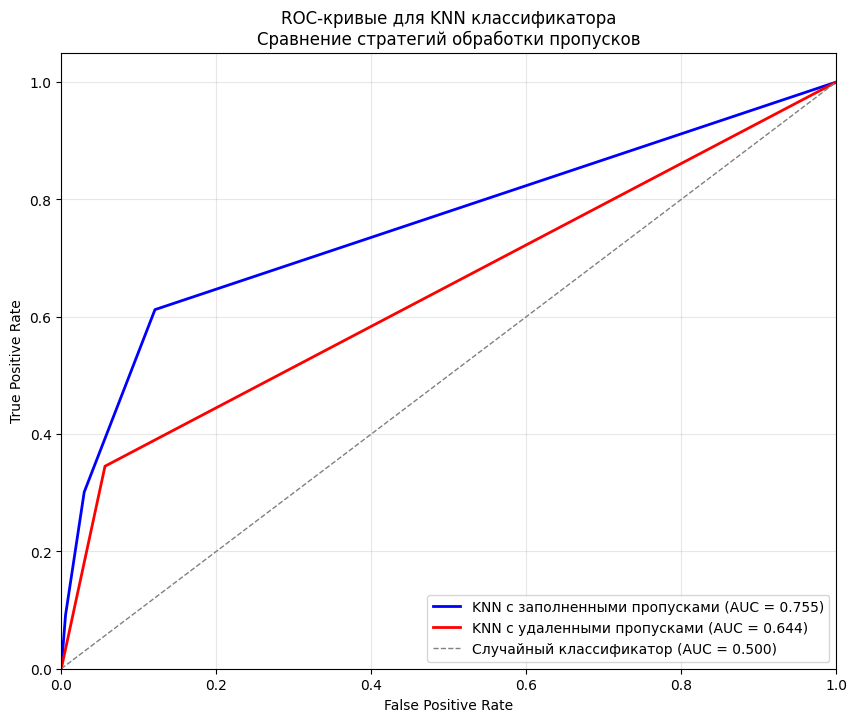

AUC для модели с заполненными пропусками: 0.755
AUC для модели с удаленными пропусками: 0.644
Модель с заполненными пропусками показывает лучшую производительность


In [70]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob_train_knn_filled = model_knn_filled.predict_proba(X_train_filled)[:, 1]
y_prob_test_knn_filled = model_knn_filled.predict_proba(X_test_filled)[:, 1]

y_prob_train_knn_deleted = model_knn_deleted.predict_proba(X_train_deleted)[:, 1]
y_prob_test_knn_deleted = model_knn_deleted.predict_proba(X_test_deleted)[:, 1]

# Вычисляем ROC-кривые и AUC для тестовых данных
fpr_filled, tpr_filled, thresholds_filled = roc_curve(y_test_filled, y_prob_test_knn_filled)
fpr_deleted, tpr_deleted, thresholds_deleted = roc_curve(y_test_deleted, y_prob_test_knn_deleted)

auc_filled = auc(fpr_filled, tpr_filled)
auc_deleted = auc(fpr_deleted, tpr_deleted)

# Строим ROC-кривые
plt.figure(figsize=(10, 8))

# Кривая для заполненных данных
plt.plot(fpr_filled, tpr_filled, color='blue', lw=2, 
         label=f'KNN с заполненными пропусками (AUC = {auc_filled:.3f})')

# Кривая для удаленных данных
plt.plot(fpr_deleted, tpr_deleted, color='red', lw=2, 
         label=f'KNN с удаленными пропусками (AUC = {auc_deleted:.3f})')

# Случайный классификатор
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', 
         label='Случайный классификатор (AUC = 0.500)')

# Настройка графика
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для KNN классификатора\nСравнение стратегий обработки пропусков')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Выводим численные значения AUC
print(f"AUC для модели с заполненными пропусками: {auc_filled:.3f}")
print(f"AUC для модели с удаленными пропусками: {auc_deleted:.3f}")

# Сравниваем модели
if auc_filled > auc_deleted:
    print("Модель с заполненными пропусками показывает лучшую производительность")
elif auc_deleted > auc_filled:
    print("Модель с удаленными пропусками показывает лучшую производительность")
else:
    print("Модели показывают одинаковую производительность")

Видим, что модель чему-то обучилась и смогла распространить свои знания на тестовую выборку, но результат довольно плохой, так как мы далено от точки (0, 1)
Теперь сделаем подбор гиперпараметра. для каждой выборки будем проводить отдельный подбор


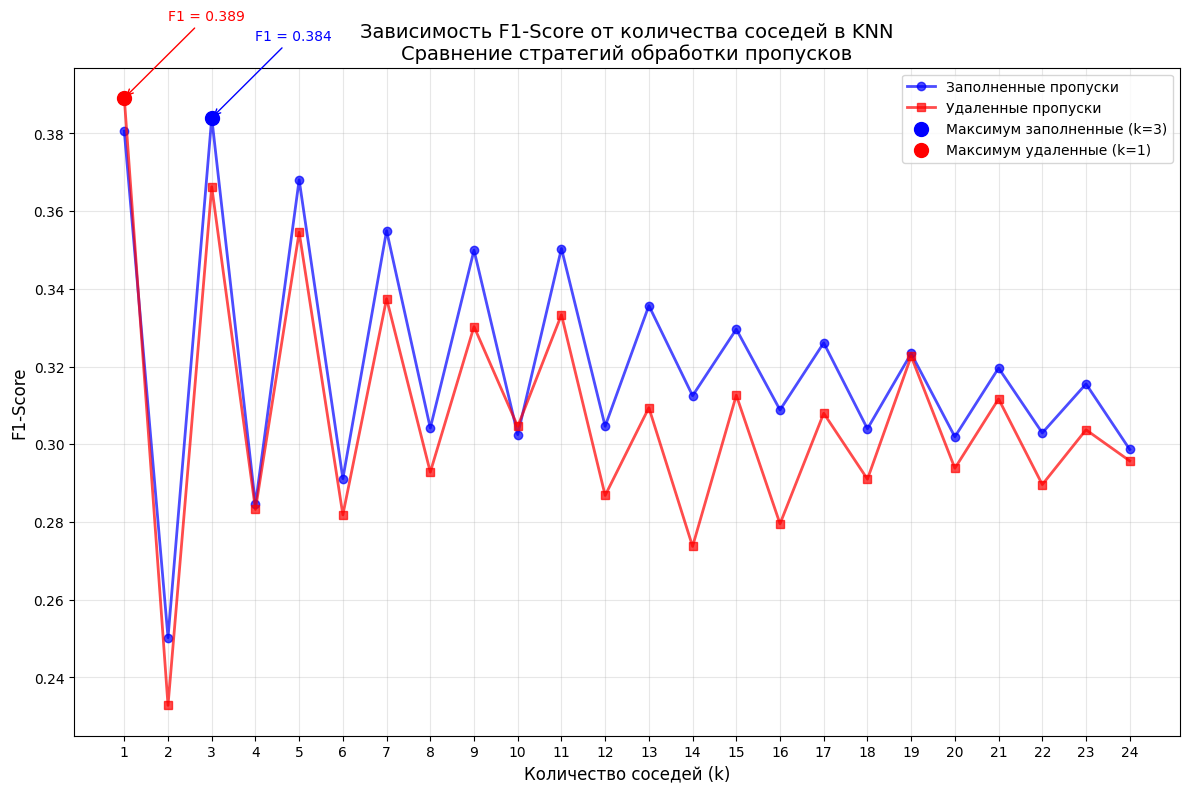

In [71]:
K = range(1, 25)

scores_test_filled= []
scores_test_deleted= []

max_score_filled = -10
max_score_deleted = -10

k_max_score_filled = 0
k_max_score_deleted = 0


for k in K:
    model_knn_filled = KNeighborsClassifier(n_neighbors=k).fit(X_train_filled, y_train_filled)
    model_knn_deleted = KNeighborsClassifier(n_neighbors=k).fit(X_train_deleted, y_train_deleted)
    
    y_pred_test_knn_filled = model_knn_filled.predict(X_test_filled)
    y_pred_test_knn_deleted = model_knn_deleted.predict(X_test_deleted)
    
    src_test_filled =  f1_score(y_pred_test_knn_filled, y_test_filled, average='binary')
    src_test_deleted = f1_score(y_pred_test_knn_deleted, y_test_deleted, average='binary')

    scores_test_filled.append(src_test_filled)
    scores_test_deleted.append(src_test_deleted)

    if(src_test_filled > max_score_filled):
        max_score_filled = src_test_filled
        k_max_score_filled = k
    if(src_test_deleted > max_score_deleted):
        max_score_deleted = src_test_deleted
        k_max_score_deleted = k

plt.figure(figsize=(12, 8))


plt.plot(K, scores_test_filled, 'b-', linewidth=2, marker='o', markersize=6, 
         label='Заполненные пропуски', alpha=0.7)


plt.plot(K, scores_test_deleted, 'r-', linewidth=2, marker='s', markersize=6, 
         label='Удаленные пропуски', alpha=0.7)


plt.scatter(k_max_score_filled, max_score_filled, color='blue', s=100, 
            zorder=5, label=f'Максимум заполненные (k={k_max_score_filled})')
plt.scatter(k_max_score_deleted, max_score_deleted, color='red', s=100, 
            zorder=5, label=f'Максимум удаленные (k={k_max_score_deleted})')


plt.xlabel('Количество соседей (k)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.title('Зависимость F1-Score от количества соседей в KNN\nСравнение стратегий обработки пропусков', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(K)


plt.annotate(f'F1 = {max_score_filled:.3f}', 
             xy=(k_max_score_filled, max_score_filled),
             xytext=(k_max_score_filled+1, max_score_filled+0.02),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=10, color='blue')

plt.annotate(f'F1 = {max_score_deleted:.3f}', 
             xy=(k_max_score_deleted, max_score_deleted),
             xytext=(k_max_score_deleted+1, max_score_deleted+0.02),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

**один сосед для удалённых данных для f1-score это немного странно. Получается, что модель какая-то слишком простая...**

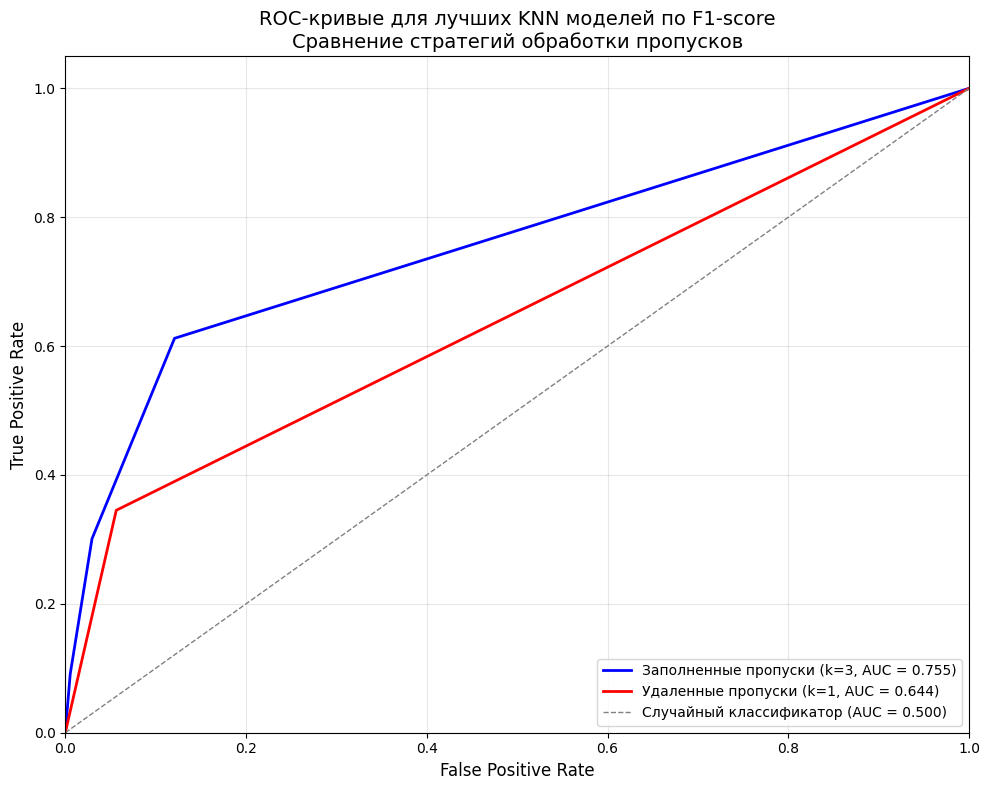

СРАВНЕНИЕ ЛУЧШИХ МОДЕЛЕЙ ПО F1-SCORE
МОДЕЛЬ С ЗАПОЛНЕННЫМИ ПРОПУСКАМИ:
  Лучший k: 3
  F1-score: 0.3840
  ROC-AUC:  0.7553

МОДЕЛЬ С УДАЛЕННЫМИ ПРОПУСКАМИ:
  Лучший k: 1
  F1-score: 0.3891
  ROC-AUC:  0.6444
 Смешанные результаты:
   - Заполненные пропуски дают лучшее качество ранжирования (AUC)
   - Удаленные пропуски дают лучшую классификацию (F1)


In [72]:
best_knn_filled = KNeighborsClassifier(n_neighbors=k_max_score_filled).fit(X_train_filled, y_train_filled)
best_knn_deleted = KNeighborsClassifier(n_neighbors=k_max_score_deleted).fit(X_train_deleted, y_train_deleted)

y_prob_test_filled = best_knn_filled.predict_proba(X_test_filled)[:, 1]
y_prob_test_deleted = best_knn_deleted.predict_proba(X_test_deleted)[:, 1]

fpr_filled, tpr_filled, thresholds_filled = roc_curve(y_test_filled, y_prob_test_filled)
fpr_deleted, tpr_deleted, thresholds_deleted = roc_curve(y_test_deleted, y_prob_test_deleted)

auc_filled = auc(fpr_filled, tpr_filled)
auc_deleted = auc(fpr_deleted, tpr_deleted)

plt.figure(figsize=(10, 8))

plt.plot(fpr_filled, tpr_filled, color='blue', lw=2, 
         label=f'Заполненные пропуски (k={k_max_score_filled}, AUC = {auc_filled:.3f})')

plt.plot(fpr_deleted, tpr_deleted, color='red', lw=2, 
         label=f'Удаленные пропуски (k={k_max_score_deleted}, AUC = {auc_deleted:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', 
         label='Случайный классификатор (AUC = 0.500)')

# Настройка графика
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-кривые для лучших KNN моделей по F1-score\nСравнение стратегий обработки пропусков', fontsize=14)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)


plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

print("=" * 70)
print("СРАВНЕНИЕ ЛУЧШИХ МОДЕЛЕЙ ПО F1-SCORE")
print("=" * 70)
print(f"МОДЕЛЬ С ЗАПОЛНЕННЫМИ ПРОПУСКАМИ:")
print(f"  Лучший k: {k_max_score_filled}")
print(f"  F1-score: {max_score_filled:.4f}")
print(f"  ROC-AUC:  {auc_filled:.4f}")
print()
print(f"МОДЕЛЬ С УДАЛЕННЫМИ ПРОПУСКАМИ:")
print(f"  Лучший k: {k_max_score_deleted}")
print(f"  F1-score: {max_score_deleted:.4f}")
print(f"  ROC-AUC:  {auc_deleted:.4f}")
print("=" * 70)

if auc_filled > auc_deleted and max_score_filled > max_score_deleted:
    print(" Модель с ЗАПОЛНЕННЫМИ пропусками лучше по ВСЕМ метрикам")
elif auc_deleted > auc_filled and max_score_deleted > max_score_filled:
    print(" Модель с УДАЛЕННЫМИ пропусками лучше по ВСЕМ метрикам")
else:
    print(" Смешанные результаты:")
    if auc_filled > auc_deleted:
        print("   - Заполненные пропуски дают лучшее качество ранжирования (AUC)")
    else:
        print("   - Удаленные пропуски дают лучшее качество ранжирования (AUC)")
    
    if max_score_filled > max_score_deleted:
        print("   - Заполненные пропуски дают лучшую классификацию (F1)")
    else:
        print("   - Удаленные пропуски дают лучшую классификацию (F1)")

from sklearn.metrics import f1_score

y_pred_filled_default = (y_prob_test_filled >= 0.5).astype(int)
y_pred_deleted_default = (y_prob_test_deleted >= 0.5).astype(int)

f1_filled_default = f1_score(y_test_filled, y_pred_filled_default)
f1_deleted_default = f1_score(y_test_deleted, y_pred_deleted_default)


[Text(0, 0.5, 'n'), Text(0, 1.5, 'y')]

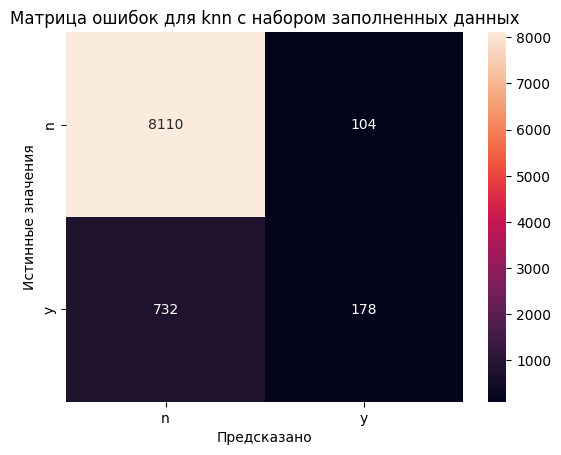

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_filled, y_pred_test_knn_filled)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Предсказано');ax.set_ylabel('Истинные значения') 
ax.set_title('Матрица ошибок для knn с набором заполненных данных');
ax.xaxis.set_ticklabels(['n', 'y']); ax.yaxis.set_ticklabels(['n', 'y'])

Видим, что модель с заполненными пропусками имеют хорошую способность к разделению, т.к. Area under curve = 0,755
\
Точности ещё не хватает. \
Модели, которая училась на данных с удалёнными пропусками имеют способность к разделению несколько хуже.\
**Попробуем Random Forrest**



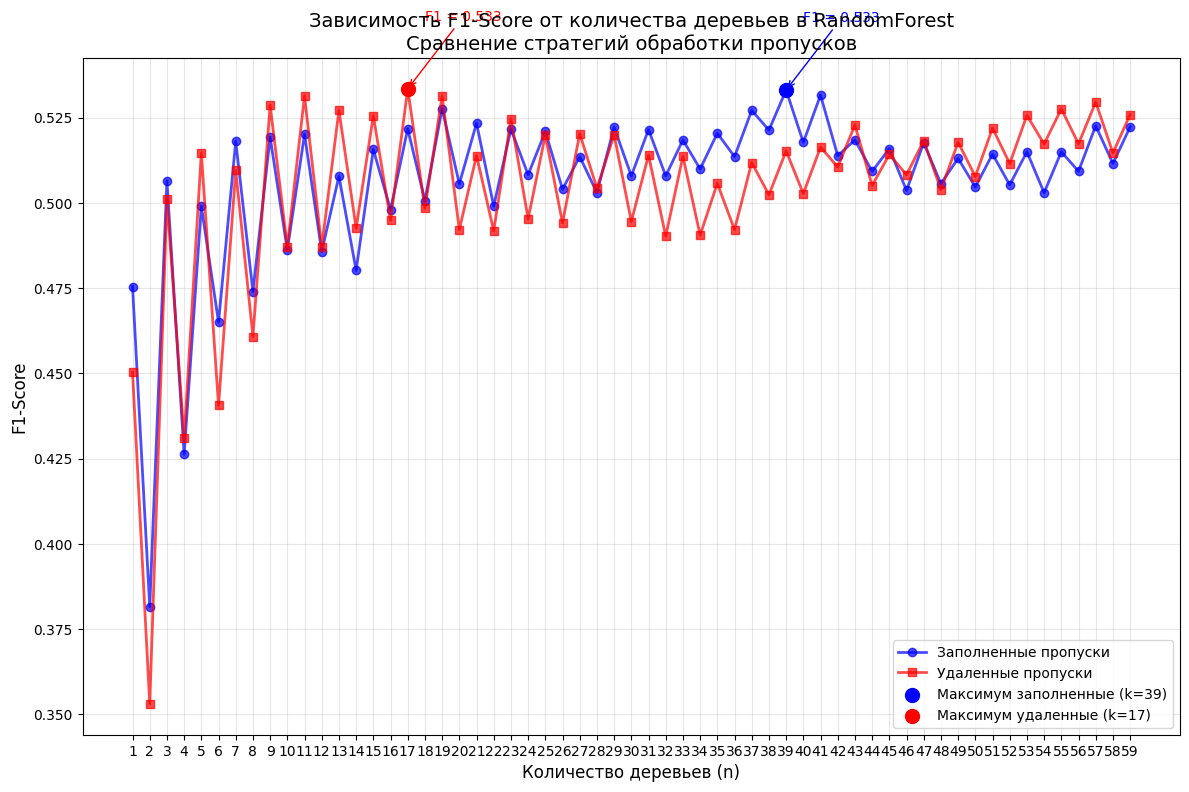

Лучший результат для заполненных данных:
  n = 39, F1-score = 0.5331
Лучший результат для удаленных данных:
  n = 17, F1-score = 0.5334


In [78]:
from sklearn.ensemble import RandomForestClassifier
N = range(1, 60)

scores_test_filled= []
scores_test_deleted= []

max_score_filled = 0
max_score_deleted = 0

n_max_score_filled = 0
n_max_score_deleted = 0


for n in N:
    model_random_forest_filled = RandomForestClassifier(n_estimators=n, random_state = 42).fit(X_train_filled, y_train_filled)
    model_random_forest_deleted = RandomForestClassifier(n_estimators=n, random_state = 42).fit(X_train_deleted, y_train_deleted)
    
    y_pred_test_random_forest_filled = model_random_forest_filled.predict(X_test_filled)
    y_pred_test_random_forest_deleted = model_random_forest_deleted.predict(X_test_deleted)
    
    src_test_filled =  f1_score(y_pred_test_random_forest_filled, y_test_filled, average='binary')
    src_test_deleted = f1_score(y_pred_test_random_forest_deleted, y_test_deleted, average='binary')

    scores_test_filled.append(src_test_filled)
    scores_test_deleted.append(src_test_deleted)

    if(src_test_filled > max_score_filled):
        max_score_filled = src_test_filled
        n_max_score_filled = n
    if(src_test_deleted > max_score_deleted):
        max_score_deleted = src_test_deleted
        n_max_score_deleted = n

plt.figure(figsize=(12, 8))


plt.plot(N, scores_test_filled, 'b-', linewidth=2, marker='o', markersize=6, 
         label='Заполненные пропуски', alpha=0.7)


plt.plot(N, scores_test_deleted, 'r-', linewidth=2, marker='s', markersize=6, 
         label='Удаленные пропуски', alpha=0.7)


plt.scatter(n_max_score_filled, max_score_filled, color='blue', s=100, 
            zorder=5, label=f'Максимум заполненные (k={n_max_score_filled})')
plt.scatter(n_max_score_deleted, max_score_deleted, color='red', s=100, 
            zorder=5, label=f'Максимум удаленные (k={n_max_score_deleted})')


plt.xlabel('Количество деревьев (n)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.title('Зависимость F1-Score от количества деревьев в RandomForest\nСравнение стратегий обработки пропусков', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(N)


plt.annotate(f'F1 = {max_score_filled:.3f}', 
             xy=(n_max_score_filled, max_score_filled),
             xytext=(n_max_score_filled+1, max_score_filled+0.02),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=10, color='blue')

plt.annotate(f'F1 = {max_score_deleted:.3f}', 
             xy=(n_max_score_deleted, max_score_deleted),
             xytext=(n_max_score_deleted+1, max_score_deleted+0.02),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

print(f"Лучший результат для заполненных данных:")
print(f"  n = {n_max_score_filled}, F1-score = {max_score_filled:.4f}")
print(f"Лучший результат для удаленных данных:")
print(f"  n = {n_max_score_deleted}, F1-score = {max_score_deleted:.4f}")

F1 для двух выборок примерно равен.
Нарисуем ROC-AUC для Random Forrest

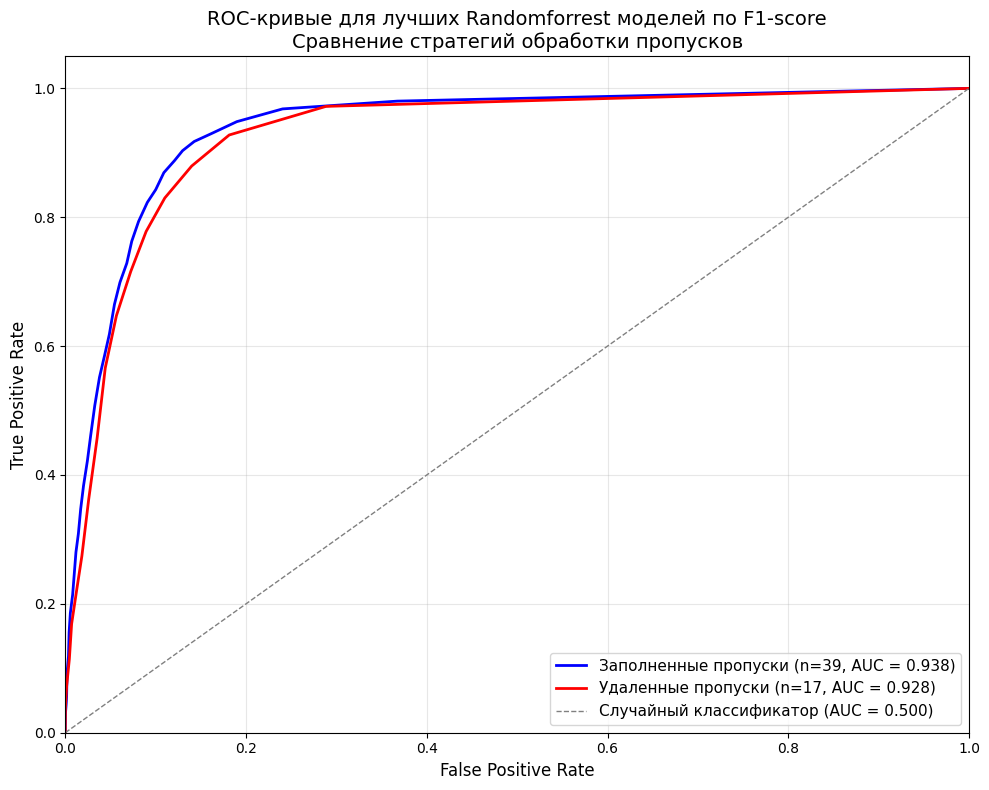

СРАВНЕНИЕ ЛУЧШИХ МОДЕЛЕЙ ПО F1-SCORE
МОДЕЛЬ С ЗАПОЛНЕННЫМИ ПРОПУСКАМИ:
  Лучший n: 39
  F1-score: 0.5331
  ROC-AUC:  0.9384

МОДЕЛЬ С УДАЛЕННЫМИ ПРОПУСКАМИ:
  Лучший n: 17
  F1-score: 0.5334
  ROC-AUC:  0.9279
 Смешанные результаты:
   - Заполненные пропуски дают лучшее качество ранжирования (AUC)
   - Удаленные пропуски дают лучшую классификацию (F1)

F1-score с порогом 0.5:
  Заполненные пропуски: 0.5381
  Удаленные пропуски: 0.5298


In [83]:
from sklearn.metrics import roc_curve, auc as auc_calc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Ваш существующий код с исправлением имени функции
best_random_forrest_filled = RandomForestClassifier(n_estimators=n_max_score_filled).fit(X_train_filled, y_train_filled)
best_random_forrest_deleted = RandomForestClassifier(n_estimators=n_max_score_deleted).fit(X_train_deleted, y_train_deleted)

y_prob_test_filled = best_random_forrest_filled.predict_proba(X_test_filled)[:, 1]
y_prob_test_deleted = best_random_forrest_deleted.predict_proba(X_test_deleted)[:, 1]

fpr_filled, tpr_filled, thresholds_filled = roc_curve(y_test_filled, y_prob_test_filled)
fpr_deleted, tpr_deleted, thresholds_deleted = roc_curve(y_test_deleted, y_prob_test_deleted)

# ИСПРАВЛЕНИЕ: используем auc_calc вместо auc
auc_filled = auc_calc(fpr_filled, tpr_filled)
auc_deleted = auc_calc(fpr_deleted, tpr_deleted)

plt.figure(figsize=(10, 8))

plt.plot(fpr_filled, tpr_filled, color='blue', lw=2, 
         label=f'Заполненные пропуски (n={n_max_score_filled}, AUC = {auc_filled:.3f})')

plt.plot(fpr_deleted, tpr_deleted, color='red', lw=2, 
         label=f'Удаленные пропуски (n={n_max_score_deleted}, AUC = {auc_deleted:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', 
         label='Случайный классификатор (AUC = 0.500)')

# Настройка графика
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-кривые для лучших Randomforrest моделей по F1-score\nСравнение стратегий обработки пропусков', fontsize=14)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 70)
print("СРАВНЕНИЕ ЛУЧШИХ МОДЕЛЕЙ ПО F1-SCORE")
print("=" * 70)
print(f"МОДЕЛЬ С ЗАПОЛНЕННЫМИ ПРОПУСКАМИ:")
print(f"  Лучший n: {n_max_score_filled}")
print(f"  F1-score: {max_score_filled:.4f}")
print(f"  ROC-AUC:  {auc_filled:.4f}")
print()
print(f"МОДЕЛЬ С УДАЛЕННЫМИ ПРОПУСКАМИ:")
print(f"  Лучший n: {n_max_score_deleted}")
print(f"  F1-score: {max_score_deleted:.4f}")
print(f"  ROC-AUC:  {auc_deleted:.4f}")
print("=" * 70)

if auc_filled > auc_deleted and max_score_filled > max_score_deleted:
    print(" Модель с ЗАПОЛНЕННЫМИ пропусками лучше по ВСЕМ метрикам")
elif auc_deleted > auc_filled and max_score_deleted > max_score_filled:
    print(" Модель с УДАЛЕННЫМИ пропусками лучше по ВСЕМ метрикам")
else:
    print(" Смешанные результаты:")
    if auc_filled > auc_deleted:
        print("   - Заполненные пропуски дают лучшее качество ранжирования (AUC)")
    else:
        print("   - Удаленные пропуски дают лучшее качество ранжирования (AUC)")
    
    if max_score_filled > max_score_deleted:
        print("   - Заполненные пропуски дают лучшую классификацию (F1)")
    else:
        print("   - Удаленные пропуски дают лучшую классификацию (F1)")

# Дополнительные метрики F1 с порогом 0.5
y_pred_filled_default = (y_prob_test_filled >= 0.5).astype(int)
y_pred_deleted_default = (y_prob_test_deleted >= 0.5).astype(int)

f1_filled_default = f1_score(y_test_filled, y_pred_filled_default)
f1_deleted_default = f1_score(y_test_deleted, y_pred_deleted_default)

print(f"\nF1-score с порогом 0.5:")
print(f"  Заполненные пропуски: {f1_filled_default:.4f}")
print(f"  Удаленные пропуски: {f1_deleted_default:.4f}")

[Text(0, 0.5, 'n'), Text(0, 1.5, 'y')]

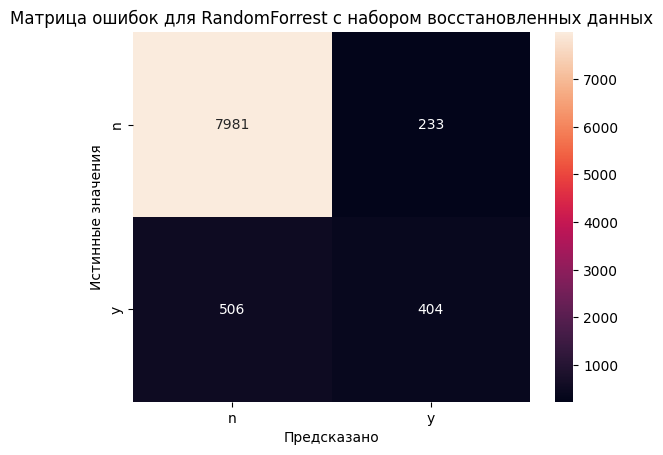

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_filled, y_pred_test_random_forest_filled)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Предсказано');ax.set_ylabel('Истинные значения') 
ax.set_title('Матрица ошибок для RandomForrest с набором восстановленных данных');
ax.xaxis.set_ticklabels(['n', 'y']); ax.yaxis.set_ticklabels(['n', 'y'])

Получили, что модели очень хорошо справляются с разделением, но с f1 тяжеловато...
Также видим из ROC видим, что полезнее синтезировать данные. Поэтому дальше не будет работать с нобором, в котором удалили данные.
Также видим, что RandomForrest лучше справляется, это видно и по f1 и по ROC-AUC.

## Вспомним, что на данном датасете наблюдается несбалансированность классов (это как раз видно из матрицы ошибок). Попробуем что-то с ним сделать. 
Можно рассмотерть несколько стратегий:
1) ничего не делать с этим, тк random forrest с оптимальным числом n и так хорошо справляется ( и даёт ROC-AUC > 0,9 и довольно близoк к точке (0,1)
2) убрать часть "перевесевших" данных. как было видно из предыдущих графиков, уменьшение набора будет вести к деградации (особенно когда у нас такой огромный перевес). Плюсы - уменьшит размерность; минусы - приведёт к потере информации.
3) генерация новых синтетических примеров, чтобы уравнять данные. Плюсы - Сохраняет всю информацию, создает разнообразные примеры; минусы - может вызвать переобучение, увеличивает размер данных



Случайная недостовеска: (5520, 53)
Случайная передовеска: (49222, 53)
NearMiss: (5520, 53)
SMOTE: (49222, 53)

=== ПОДБОР ГИПЕРПАРАМЕТРА k ДЛЯ KNN (по F1) ===

--- Исходные данные ---
Лучший k по F1: 3, F1 = 0.3846

--- Случайная недостовеска ---
Лучший k по F1: 67, F1 = 0.5022

--- Случайная передовеска ---
Лучший k по F1: 70, F1 = 0.4983

--- NearMiss ---
Лучший k по F1: 70, F1 = 0.3901

--- SMOTE ---
Лучший k по F1: 70, F1 = 0.4659

=== ВЫЧИСЛЕНИЕ ROC-AUC ДЛЯ ЛУЧШИХ k (по F1) ===
Исходные данные: k=3, ROC-AUC = 0.7555
Случайная недостовеска: k=67, ROC-AUC = 0.8939
Случайная передовеска: k=70, ROC-AUC = 0.8766
NearMiss: k=70, ROC-AUC = 0.8247
SMOTE: k=70, ROC-AUC = 0.8837


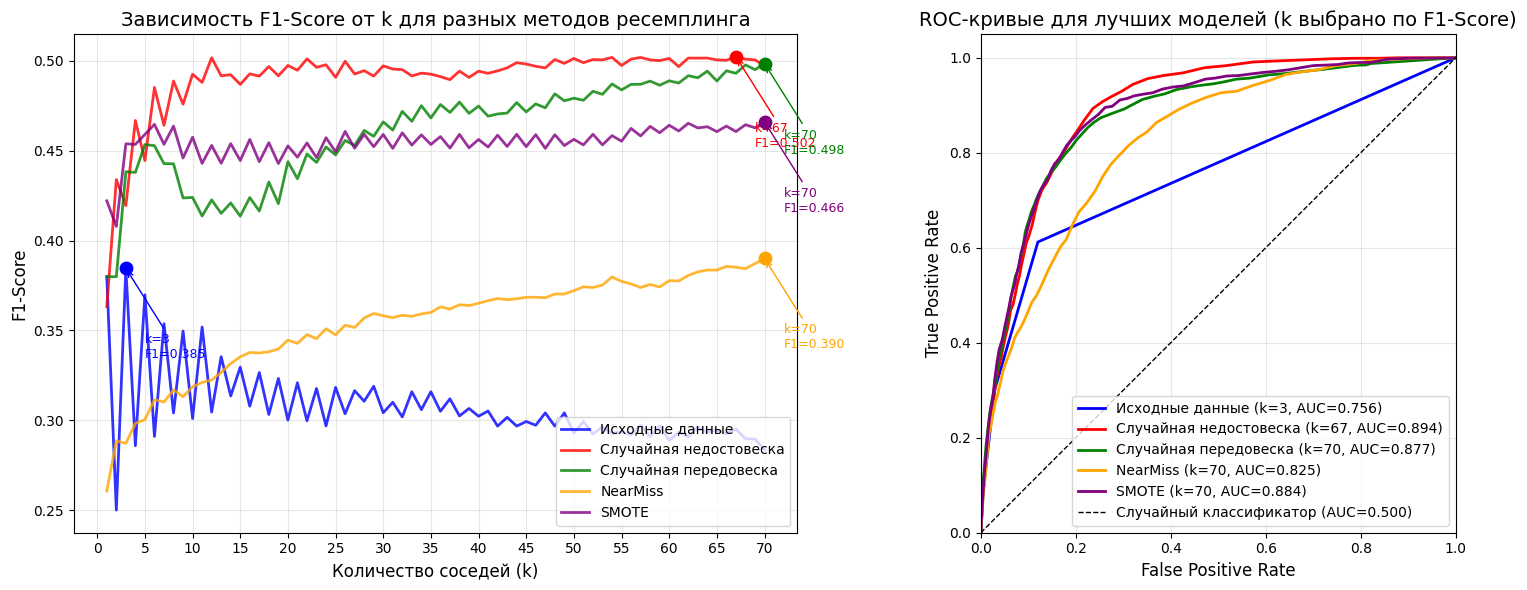


СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
Метод                     Лучший k (F1)   F1-Score   ROC-AUC   
--------------------------------------------------------------------------------
Исходные данные           3               0.3846     0.7555    
Случайная недостовеска    67              0.5022     0.8939    
Случайная передовеска     70              0.4983     0.8766    
NearMiss                  70              0.3901     0.8247    
SMOTE                     70              0.4659     0.8837    

Лучший метод по F1-Score: Случайная недостовеска (k=67, F1=0.5022)
Лучший метод по ROC-AUC: Случайная недостовеска (k=67, AUC=0.8939)

Сравнение с исходными данными (F1=0.3846, AUC=0.7555):
Случайная недостовеска: F1 +30.6%, AUC +18.3%
Случайная передовеска: F1 +29.6%, AUC +16.0%
NearMiss: F1 +1.4%, AUC +9.2%
SMOTE: F1 +21.2%, AUC +17.0%


<Figure size 640x480 with 0 Axes>

In [85]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.transform(X_test_filled)

undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train_scaled, y_train_filled)
print(f"Случайная недостовеска: {X_under.shape}")

oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X_train_scaled, y_train_filled)
print(f"Случайная передовеска: {X_over.shape}")

nearmiss = NearMiss(version=1)
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_train_scaled, y_train_filled)
print(f"NearMiss: {X_nearmiss.shape}")

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train_filled)
print(f"SMOTE: {X_smote.shape}")

datasets = {
    'Исходные данные': (X_train_scaled, y_train_filled),
    'Случайная недостовеска': (X_under, y_under),
    'Случайная передовеска': (X_over, y_over),
    'NearMiss': (X_nearmiss, y_nearmiss),
    'SMOTE': (X_smote, y_smote)
}

# Подбор гиперпараметра k для каждого набора
K = range(1, 71)

# Словари для хранения результатов
f1_scores = {name: [] for name in datasets}
max_f1_scores = {name: 0 for name in datasets}
best_k_f1 = {name: 0 for name in datasets}
best_models = {name: None for name in datasets}
best_probas = {name: None for name in datasets}  # Сохраним вероятности для ROC-кривых

print("\n=== ПОДБОР ГИПЕРПАРАМЕТРА k ДЛЯ KNN (по F1) ===")

for name, (X_train_resampled, y_train_resampled) in datasets.items():
    print(f"\n--- {name} ---")
    
    for k in K:
        model_knn = KNeighborsClassifier(n_neighbors=k)
        model_knn.fit(X_train_resampled, y_train_resampled)
    
        y_pred = model_knn.predict(X_test_scaled)
        
        f1 = f1_score(y_test_filled, y_pred, average='binary')
        
        f1_scores[name].append(f1)
        
        if f1 > max_f1_scores[name]:
            max_f1_scores[name] = f1
            best_k_f1[name] = k
            best_models[name] = model_knn
    
    print(f"Лучший k по F1: {best_k_f1[name]}, F1 = {max_f1_scores[name]:.4f}")

print("\n=== ВЫЧИСЛЕНИЕ ROC-AUC ДЛЯ ЛУЧШИХ k (по F1) ===")
roc_data = {}  # Будем хранить данные для ROC-кривых

for name in datasets.keys():
    # Получаем лучшую модель для этого метода
    best_model = best_models[name]
    
    # Вычисляем вероятности для ROC-AUC
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    best_probas[name] = y_proba
    
    # Вычисляем ROC-AUC
    auc = roc_auc_score(y_test_filled, y_proba)
    
    # Вычисляем данные для ROC-кривой
    fpr, tpr, _ = roc_curve(y_test_filled, y_proba)
    roc_data[name] = (fpr, tpr, auc)
    
    print(f"{name}: k={best_k_f1[name]}, ROC-AUC = {auc:.4f}")

plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'red', 'green', 'orange', 'purple']

# График 1: F1-Score в зависимости от k
for i, (name, scores) in enumerate(f1_scores.items()):
    ax1.plot(K, scores, color=colors[i], linewidth=2, label=name, alpha=0.8)
    # Отмечаем точку максимума F1
    ax1.scatter(best_k_f1[name], max_f1_scores[name], color=colors[i], s=80, zorder=5)
    ax1.annotate(f'k={best_k_f1[name]}\nF1={max_f1_scores[name]:.3f}', 
                xy=(best_k_f1[name], max_f1_scores[name]),
                xytext=(best_k_f1[name]+2, max_f1_scores[name]-0.05),
                arrowprops=dict(arrowstyle='->', color=colors[i]),
                fontsize=9, color=colors[i])

ax1.set_xlabel('Количество соседей (k)', fontsize=12)
ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_title('Зависимость F1-Score от k для разных методов ресемплинга', fontsize=14)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(0, 71, 5))

# График 2: ROC-кривые для лучших моделей (по F1)
for i, (name, (fpr, tpr, auc)) in enumerate(roc_data.items()):
    ax2.plot(fpr, tpr, color=colors[i], linewidth=2, 
             label=f'{name} (k={best_k_f1[name]}, AUC={auc:.3f})')

# Линия случайного классификатора
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Случайный классификатор (AUC=0.500)')

ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC-кривые для лучших моделей (k выбрано по F1-Score)', fontsize=14)
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

# Устанавливаем одинаковые пределы для осей
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

# Вывод сводной таблицы результатов
print("\n" + "="*80)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*80)

print(f"{'Метод':<25} {'Лучший k (F1)':<15} {'F1-Score':<10} {'ROC-AUC':<10}")
print("-" * 80)

for name in datasets.keys():
    fpr, tpr, auc = roc_data[name]
    print(f"{name:<25} {best_k_f1[name]:<15} {max_f1_scores[name]:<10.4f} {auc:<10.4f}")

# Анализ лучших методов
best_method_f1 = max(max_f1_scores, key=max_f1_scores.get)
best_method_auc = max(roc_data, key=lambda x: roc_data[x][2])  # Индекс 2 - это AUC

print(f"\nЛучший метод по F1-Score: {best_method_f1} (k={best_k_f1[best_method_f1]}, F1={max_f1_scores[best_method_f1]:.4f})")
print(f"Лучший метод по ROC-AUC: {best_method_auc} (k={best_k_f1[best_method_auc]}, AUC={roc_data[best_method_auc][2]:.4f})")

# Сравнение с исходными данными
base_f1 = max_f1_scores['Исходные данные']
base_auc = roc_data['Исходные данные'][2]

print(f"\nСравнение с исходными данными (F1={base_f1:.4f}, AUC={base_auc:.4f}):")
for name in datasets.keys():
    if name != 'Исходные данные':
        f1_improvement = ((max_f1_scores[name] - base_f1) / base_f1) * 100
        auc_improvement = ((roc_data[name][2] - base_auc) / base_auc) * 100
        print(f"{name}: F1 {f1_improvement:+.1f}%, AUC {auc_improvement:+.1f}%")

plt.tight_layout()
plt.show()

Видим, что случайная недовеска помогает повысить F1 и AUc на 30% и 18% соответсвенно. Также хороший резудьаь даёт случаяная передовеска.

Общий вывод:
Лучшим оказался метод Random Forrest, ROC-AUC получилась 0,93  ,что является хорошим показателем. Метод knn до sampling_a данных давал намного хуже результаты.
Удлаось побороться с несбалансированностью классов: downsampling дал лучшие результаты, но и random upsampling дал хорошие результаты.
В датасете были искусствено добавлены новые записи вместо unknown, это даёт лучше результат для ROC-AUC
Удаление сильнокоррелирующих переменных помогает избежать мультиколлинеарности.

